In [168]:
# import necessary library
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import re
import numpy as np
import geopandas as gpd
from shapely.geometry import Point # Point class
from shapely.geometry import shape
import networkx as nx
import osmnx as ox
import os 
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay
import shapely.geometry as geom
import shapely.wkt

In [169]:
import os, time, math
import math
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sn
#from keras.optimizers import Adam

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline
from matplotlib import pyplot as plt
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble
import sklearn.metrics as metrics 
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
#from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from xgboost import XGBRegressor
import math
#from tune_sklearn import TuneGridSearchCV
from sklearn import tree

In [170]:
# Helper Function
def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [171]:
# show all file path here
file_path='C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Modeling_Sep22,2023'

In [208]:
# read the data
data=pd.read_csv(f'{file_path}/Model_clean_data_july23_AADBT.csv')
data['bike_fac']=data['path']+data['bike_lane']+data['bike_route']+data['cycle_track']+data['trail']
data.head()

Unnamed: 0   county      X       ID location        Lat       Long    year  \
0         1.0  Alameda  122.0   8578.0    urban  37.849934 -122.28885  2018.0   
1         4.0  Alameda  128.0  14389.0    urban  37.533787 -122.07950  2017.0   
2         5.0  Alameda  129.0  14389.0    urban  37.533787 -122.07950  2018.0   
3         6.0  Alameda  130.0  14389.0    urban  37.533787 -122.07950  2019.0   
4         7.0  Alameda  127.0  14389.0    urban  37.533787 -122.07950  2016.0   

       ATT  no_of_months_data_collected  ... speed_less_than_30  \
0  11376.0                          1.0  ...                1.0   
1  69539.0                         12.0  ...                0.0   
2  77973.0                         12.0  ...                0.0   
3  76522.0                         12.0  ...                0.0   
4  55379.0                          9.0  ...                0.0   

   Speed_30_or_Above  speed_less_than_25  Speed_25_or_Above  \
0                0.0                 0.0                1.0   
1                1.0                 0.0                1.0   
2                1.0                 0.0                1.0   
3                1.0                 0.0                1.0   
4                1.0                 0.0                1.0   

   speed_less_than_20 Speed_20_or_Above        Mean         std  outlier  \
0                 0.0               1.0  148.898849  158.580163    False   
1                 0.0               1.0  148.898849  158.580163    False   
2                 0.0               1.0  148.898849  158.580163    False   
3                 0.0               1.0  148.898849  158.580163    False   
4                 0.0               1.0  148.898849  158.580163    False   

   bike_fac  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 199 columns]

In [209]:
list(data.columns)

['Unnamed: 0',
 'county',
 'X',
 'ID',
 'location',
 'Lat',
 'Long',
 'year',
 'ATT',
 'no_of_months_data_collected',
 'type',
 'AADB',
 'ATT.in.Million',
 'matched_seg_id',
 'segment_id',
 'street_name',
 'tdg_id',
 'lrs_cal_id',
 'bikes_proh',
 'int_tdg_id',
 'loc_id',
 'seg_counter',
 'fclass',
 'tasas_ids',
 'ataip_ids',
 'fc_draft',
 'speed',
 'slope',
 'empnum_density_t',
 'geom_length',
 'access_code',
 'adt_amt',
 'truck_adt_amt',
 'rt_lanes_amt',
 'lt_lanes_amt',
 'rt_trav_way_width',
 'rt_i_shd_tot_width',
 'rt_o_shd_tot_width',
 'lt_trav_way_width',
 'lt_i_shd_tot_width',
 'lt_o_shd_tot_width',
 'near_strava_id',
 'empnum_density_q',
 'empnum_density_h',
 'near_univ_miles',
 'near_large_univ_miles',
 'eco_type',
 'geometry',
 'forward_trip_count',
 'reverse_trip_count',
 'forward_commute_trip_count',
 'reverse_commute_trip_count',
 'forward_leisure_trip_count',
 'reverse_leisure_trip_count',
 'forward_average_speed',
 'reverse_average_speed',
 'index',
 'Leg',
 'ATT.in.Thous

In [210]:
data['overall_mean']=data['AADB'].mean()
data['overall_std']=data['AADB'].std()
data['outlier_threshold']=5*data['overall_mean']+5*data['overall_std']
#Count > 5 × mean count + 5 × standard deviation


In [211]:
data.shape

(4216, 202)

In [212]:
# drop the extreme high volume sites based on above criteria
data=data.loc[data['AADB']<=data['outlier_threshold']]
data.shape

(4202, 202)

In [213]:
data['county'].unique()

array(['Alameda', 'Butte', 'Contra Costa', 'Del Norte', 'Douglas',
       'El Dorado', 'Fresno', 'Humboldt', 'Inyo', 'Kern', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mendocino', 'Nevada', 'Orange',
       'Placer', 'Sacramento', 'San Diego', 'San Francisco',
       'San Luis Obispo', 'San Mateo', 'Santa Clara', 'Santa Cruz',
       'Sutter', 'Washoe', 'Yolo', 'Yuba'], dtype=object)

# Run the Descriptive Stat

In [178]:
data['AADB'].describe()

count    4202.000000
mean      161.681818
std       233.171237
min         1.000000
25%        38.000000
50%        82.000000
75%       180.000000
max      2142.000000
Name: AADB, dtype: float64

In [179]:
per=data.loc[data['type']=='eco_permanent']
per_uni=per.drop_duplicates(subset=['ID'], keep='first')
short=data.loc[data['type']=='short_term']
short_uni=short.drop_duplicates(subset=['tdg_id'], keep='first')

In [180]:
per.shape, short.shape,short_uni.shape,per_uni.shape

((643, 202), (3559, 202), (2589, 202), (197, 202))

In [181]:
per['AADB'].describe()

count     643.000000
mean      314.438569
std       409.749080
min         1.000000
25%        54.500000
50%       136.000000
75%       397.000000
max      2142.000000
Name: AADB, dtype: float64

<Figure size 3600x3600 with 0 Axes>

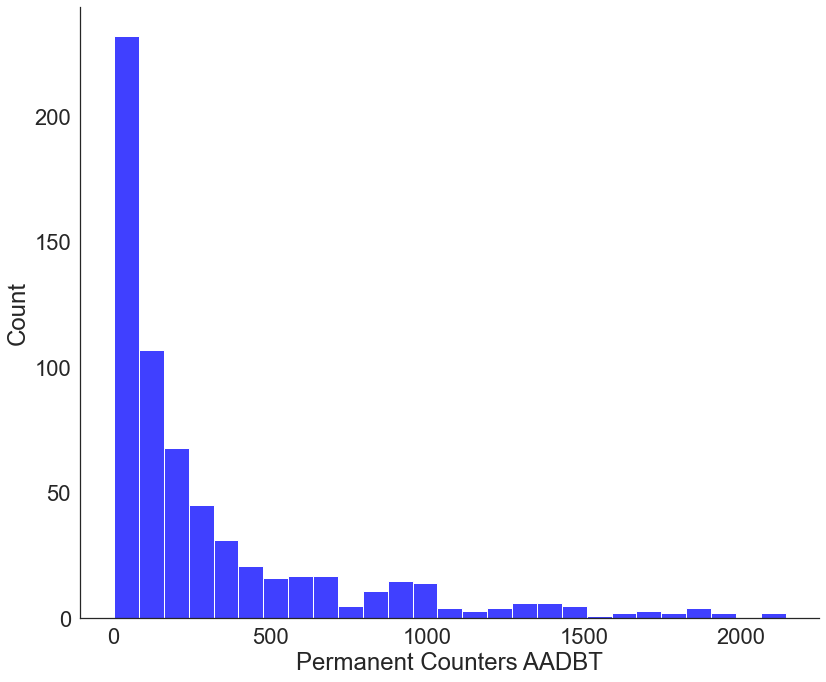

In [182]:
# Bar density plot for permanent counters AADBT
#import seaborn as sns
plt.figure(figsize=(50,50))
sns.set_theme(style='white',font_scale=2, palette='deep')
#sns.set(font_scale=3) 
#sns.set(rc={'figure.figsize':(40,40)})
g=sns.displot(per, x="AADB", color='blue',height=10, aspect=1.2,)
#g=sns.scatterplot(data=data, x="Stv_adb", y="AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Permanent Counters AADBT')
#g.legend(fontsize=20)
#abline(1, (0,0))
# plt.xlim(0,3300)
# plt.ylim(0,3300)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
plt.show()

In [183]:
short['AADB'].describe()

count    3559.000000
mean      134.083450
std       170.061279
min         3.000000
25%        37.000000
50%        75.000000
75%       160.000000
max      1967.000000
Name: AADB, dtype: float64

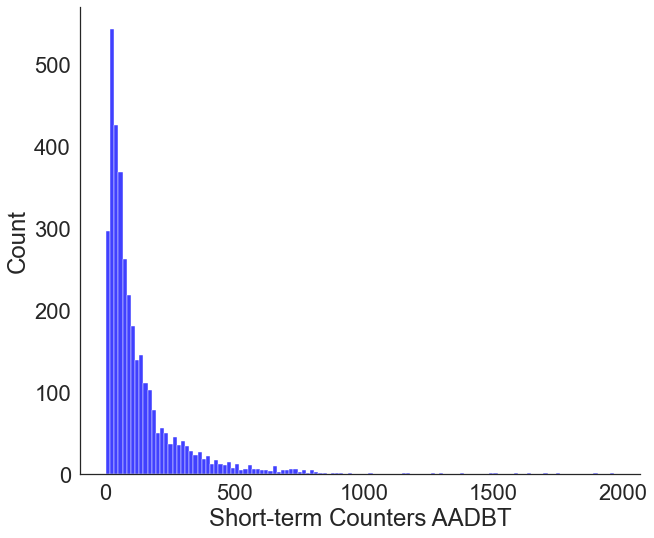

In [184]:
sns.set_theme(style='white',font_scale=2, palette='deep')
g=sns.displot(short, x="AADB", color='blue',height=8, aspect=1.2)
g.set(xlabel='Short-term Counters AADBT')
plt.show()

In [185]:
# Descriptive statistics by facilities
print('unique_permanent counter:',per_uni.groupby(['path'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['bike_lane'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['bike_route'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['cycle_track'])['AADB'].count())
print('unique_permanent counter:',per_uni.groupby(['trail'])['AADB'].count())
both=per_uni.loc[per_uni['bike_fac']==0]
print('unique_permanent counter on other facilitie:',both.shape)

# total gross counter
print('total_permanent counter:',per.groupby(['path'])['AADB'].count())
print('total_permanent counter:',per.groupby(['bike_lane'])['AADB'].count())
print('total_permanent counter:',per.groupby(['bike_route'])['AADB'].count())
print('total_permanent counter:',per.groupby(['cycle_track'])['AADB'].count())
print('total_permanent counter:',per.groupby(['trail'])['AADB'].count())
tboth=per.loc[per['bike_fac']==0]
print('total_permanent counter on other facilities:',tboth.shape)


# total gross counter
print('total_permanent counter:',per.groupby(['path'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['bike_lane'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['bike_route'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['cycle_track'])['AADB'].describe())
print('total_permanent counter:',per.groupby(['trail'])['AADB'].describe())
#print('total_permanent counter:',per.groupby(['trail'])['AADB'].describe())
print('total_permanent counter:',tboth['AADB'].describe())

unique_permanent counter: path
0.0    145
1.0     52
Name: AADB, dtype: int64
unique_permanent counter: bike_lane
0.0    130
1.0     67
Name: AADB, dtype: int64
unique_permanent counter: bike_route
0.0    155
1.0     42
Name: AADB, dtype: int64
unique_permanent counter: cycle_track
0.0    197
Name: AADB, dtype: int64
unique_permanent counter: trail
0.0    196
1.0      1
Name: AADB, dtype: int64
unique_permanent counter on other facilitie: (35, 202)
total_permanent counter: path
0.0    483
1.0    160
Name: AADB, dtype: int64
total_permanent counter: bike_lane
0.0    420
1.0    223
Name: AADB, dtype: int64
total_permanent counter: bike_route
0.0    492
1.0    151
Name: AADB, dtype: int64
total_permanent counter: cycle_track
0.0    643
Name: AADB, dtype: int64
total_permanent counter: trail
0.0    641
1.0      2
Name: AADB, dtype: int64
total_permanent counter on other facilities: (107, 202)
total_permanent counter:       count        mean         std  min   25%    50%    75%     max
path

In [186]:
# Descriptive statistics by facilities
print('unique_short counter:',short_uni.groupby(['path'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['bike_lane'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['bike_route'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['cycle_track'])['AADB'].count())
print('unique_short counter:',short_uni.groupby(['trail'])['AADB'].count())
both=short_uni.loc[short_uni['bike_fac']==0]
print('unique_pshort counter on other facilitie:',both.shape)

# total gross counter
print('total_short counter:',short.groupby(['path'])['AADB'].count())
print('total_short counter:',short.groupby(['bike_lane'])['AADB'].count())
print('total_short counter:',short.groupby(['bike_route'])['AADB'].count())
print('total_short counter:',short.groupby(['cycle_track'])['AADB'].count())
print('total_short counter:',short.groupby(['trail'])['AADB'].count())
tboth=short.loc[short['bike_fac']==0]
print('total_short counter on other facilities:',tboth.shape)


# total gross counter
print('total_short counter:',short.groupby(['path'])['AADB'].describe())
print('total_short counter:',short.groupby(['bike_lane'])['AADB'].describe())
print('total_short counter:',short.groupby(['bike_route'])['AADB'].describe())
print('total_short counter:',short.groupby(['cycle_track'])['AADB'].describe())
print('total_short counter:',short.groupby(['trail'])['AADB'].describe())
print('total_short counter:',tboth['AADB'].describe())

unique_short counter: path
0.0    2545
1.0      44
Name: AADB, dtype: int64
unique_short counter: bike_lane
0.0    2226
1.0     363
Name: AADB, dtype: int64
unique_short counter: bike_route
0.0    2395
1.0     194
Name: AADB, dtype: int64
unique_short counter: cycle_track
0.0    2584
1.0       5
Name: AADB, dtype: int64
unique_short counter: trail
0.0    2587
1.0       2
Name: AADB, dtype: int64
unique_pshort counter on other facilitie: (1981, 202)
total_short counter: path
0.0    3495
1.0      64
Name: AADB, dtype: int64
total_short counter: bike_lane
0.0    3025
1.0     534
Name: AADB, dtype: int64
total_short counter: bike_route
0.0    3214
1.0     345
Name: AADB, dtype: int64
total_short counter: cycle_track
0.0    3554
1.0       5
Name: AADB, dtype: int64
total_short counter: trail
0.0    3557
1.0       2
Name: AADB, dtype: int64
total_short counter on other facilities: (2609, 202)
total_short counter:        count        mean         std   min   25%   50%    75%     max
path     

In [187]:
# Creat some urban Vs rural and Geolocation Binary variable
# urban
data['urban']=np.where(data['location']=='urban',1,0)
data['rural']=np.where(data['location']=='rural',1,0)
data['Alameda']=np.where(data['county']=='Alameda',1,0)
data['San_Francisco']=np.where(data['county']=='San Francisco',1,0)
data['Los_Angeles']=np.where(data['county']=='Los Angeles',1,0)
data['San_Diego']=np.where(data['county']=='San Diego',1,0)
data['Yolo']=np.where(data['county']=='Yolo',1,0)
data['Orange']=np.where(data['county']=='Orange',1,0)

In [188]:
data.head()

Unnamed: 0   county      X       ID location        Lat       Long    year  \
0         1.0  Alameda  122.0   8578.0    urban  37.849934 -122.28885  2018.0   
1         4.0  Alameda  128.0  14389.0    urban  37.533787 -122.07950  2017.0   
2         5.0  Alameda  129.0  14389.0    urban  37.533787 -122.07950  2018.0   
3         6.0  Alameda  130.0  14389.0    urban  37.533787 -122.07950  2019.0   
4         7.0  Alameda  127.0  14389.0    urban  37.533787 -122.07950  2016.0   

       ATT  no_of_months_data_collected  ... overall_std  outlier_threshold  \
0  11376.0                          1.0  ...  268.356852        2183.916944   
1  69539.0                         12.0  ...  268.356852        2183.916944   
2  77973.0                         12.0  ...  268.356852        2183.916944   
3  76522.0                         12.0  ...  268.356852        2183.916944   
4  55379.0                          9.0  ...  268.356852        2183.916944   

   urban  rural  Alameda San_Francisco  Los_Angeles  San_Diego  Yolo  Orange  
0      1      0        1             0            0          0     0       0  
1      1      0        1             0            0          0     0       0  
2      1      0        1             0            0          0     0       0  
3      1      0        1             0            0          0     0       0  
4      1      0        1             0            0          0     0       0  

[5 rows x 210 columns]

In [189]:
data['county'].unique()

array(['Alameda', 'Butte', 'Contra Costa', 'Del Norte', 'Douglas',
       'El Dorado', 'Fresno', 'Humboldt', 'Inyo', 'Kern', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mendocino', 'Nevada', 'Orange',
       'Placer', 'Sacramento', 'San Diego', 'San Francisco',
       'San Luis Obispo', 'San Mateo', 'Santa Clara', 'Santa Cruz',
       'Sutter', 'Washoe', 'Yolo', 'Yuba'], dtype=object)

In [190]:
data['AADB'].describe()

count    4202.000000
mean      161.681818
std       233.171237
min         1.000000
25%        38.000000
50%        82.000000
75%       180.000000
max      2142.000000
Name: AADB, dtype: float64

In [191]:
data['slope'].describe()

count    4202.000000
mean        0.012879
std         0.018763
min         0.000000
25%         0.002775
50%         0.006522
75%         0.015048
max         0.261190
Name: slope, dtype: float64

In [192]:
data['log_Stv_commute_adb']=np.log(data['Stv_commute_adb']+0.01)
data['log_Stv_leisure_adb']=np.log(data['Stv_leisure_adb']+0.01)
data['Stv_adb']=data['Stv_leisure_adb']+data['Stv_commute_adb']
data['log_Stv_adb']=np.log(data['Stv_adb']+0.01)
data['log_slope']=np.log(data['slope']+0.01)
data1=data.fillna(0)
data1=data1.drop(['geometry'],axis=1)
data1.head()

Unnamed: 0   county      X       ID location        Lat       Long    year  \
0         1.0  Alameda  122.0   8578.0    urban  37.849934 -122.28885  2018.0   
1         4.0  Alameda  128.0  14389.0    urban  37.533787 -122.07950  2017.0   
2         5.0  Alameda  129.0  14389.0    urban  37.533787 -122.07950  2018.0   
3         6.0  Alameda  130.0  14389.0    urban  37.533787 -122.07950  2019.0   
4         7.0  Alameda  127.0  14389.0    urban  37.533787 -122.07950  2016.0   

       ATT  no_of_months_data_collected  ... San_Francisco  Los_Angeles  \
0  11376.0                          1.0  ...             0            0   
1  69539.0                         12.0  ...             0            0   
2  77973.0                         12.0  ...             0            0   
3  76522.0                         12.0  ...             0            0   
4  55379.0                          9.0  ...             0            0   

   San_Diego  Yolo  Orange log_Stv_commute_adb  log_Stv_leisure_adb  \
0          0     0       0            2.268773             1.820409   
1          0     0       0           -2.974051            -2.848257   
2          0     0       0           -3.286158            -2.736534   
3          0     0       0           -2.736534            -2.974051   
4          0     0       0           -2.974051            -2.848257   

     Stv_adb  log_Stv_adb  log_slope  
0  15.821918     2.762028  -3.822693  
1   0.089041    -2.312220  -4.588440  
2   0.082192    -2.383884  -4.588440  
3   0.095890    -2.245351  -4.588440  
4   0.089041    -2.312220  -4.588440  

[5 rows x 214 columns]

In [193]:
data1['Stv_adb'].describe()

count    4202.000000
mean       10.947147
std        31.997261
min         0.000000
25%         0.410959
50%         2.328767
75%         8.332192
max       420.890411
Name: Stv_adb, dtype: float64

In [194]:
data1['tdg_id']

0       208578.0
1       214389.0
2       214389.0
3       214389.0
4       214389.0
          ...   
4208    136444.0
4209    136269.0
4210    135992.0
4211    136408.0
4212    136500.0
Name: tdg_id, Length: 4202, dtype: float64

In [195]:
check=data.loc[data['tdg_id']==208578]
check

Unnamed: 0   county      X      ID location        Lat       Long    year  \
0         1.0  Alameda  122.0  8578.0    urban  37.849934 -122.28885  2018.0   
6         9.0  Alameda  120.0  8578.0    urban  37.849934 -122.28885  2016.0   
7        10.0  Alameda  121.0  8578.0    urban  37.849934 -122.28885  2017.0   

        ATT  no_of_months_data_collected  ... San_Francisco  Los_Angeles  \
0   11376.0                          1.0  ...             0            0   
6  132990.0                         12.0  ...             0            0   
7  117569.0                         10.0  ...             0            0   

   San_Diego  Yolo  Orange log_Stv_commute_adb  log_Stv_leisure_adb  \
0          0     0       0            2.268773             1.820409   
6          0     0       0            2.371689             1.886924   
7          0     0       0            2.371689             1.886924   

     Stv_adb  log_Stv_adb  log_slope  
0  15.821918     2.762028  -3.822693  
6  17.294521     2.850968  -3.822693  
7  17.294521     2.850968  -3.822693  

[3 rows x 215 columns]

In [196]:
# # Plot AADBT Vs Strava AADBT
# sns.set(font_scale=2.0) 
# plt.figure(figsize=(20,20))
# g=sns.regplot(x="Stv_adb", y="AADB", data=data,scatter_kws={"s": 80},color='purple') #
# #g=sns.scatterplot(data=data, x="Stv_adb", y="AADB", hue="county", palette="bright",s=80)
# g.set(xlabel='Strava AADBT', ylabel='Observed AADBT')
# #g.legend(fontsize=20)
# #abline(1, (0,0))
# # plt.xlim(0,3300)
# # plt.ylim(0,3300)
# plt.xticks(fontsize=30)
# plt.yticks(fontsize=30)
# plt.show()

In [197]:
# # Plot AADBT Vs Strava AADBT
# sns.set(font_scale=2) 
# plt.figure(figsize=(20,20))
# g=sns.regplot(x="Stv_commute_adb", y="AADB", data=data,scatter_kws={"s": 80},color='purple') #
# #g=sns.scatterplot(data=data, x="Stv_commute_adb", y="AADB", hue="county", palette="bright",s=80)
# g.set(xlabel='Strava Commute AADBT', ylabel='Observed AADBT')
# #g.legend(fontsize=20)
# #abline(1, (0,0))
# # plt.xlim(0,3300)
# # plt.ylim(0,3300)
# plt.xticks(fontsize=30)
# plt.yticks(fontsize=30)
# plt.show()

In [198]:
# # Plot AADBT Vs Strava AADBT
# sns.set(font_scale=2) 
# plt.figure(figsize=(20,20))
# g=sns.regplot(x="Stv_leisure_adb", y="AADB", data=data,scatter_kws={"s": 80},color='purple', order=1) #
# #g=sns.scatterplot(data=data, x="Stv_leisure_adb", y="AADB", hue="county", palette="bright",s=80)
# g.set(xlabel='Strava Leisure AADBT', ylabel='Observed AADBT')
# #g.legend(fontsize=20)
# #abline(1, (0,0))
# # plt.xlim(0,3300)
# # plt.ylim(0,3300)
# plt.xticks(fontsize=30)
# plt.yticks(fontsize=30)
# plt.show()

In [199]:
gdf = gpd.GeoDataFrame(
    data1, geometry=gpd.points_from_xy(data1.Long, data1.Lat), crs="EPSG:4326"
)
gdf.head()

Unnamed: 0   county      X       ID location        Lat       Long    year  \
0         1.0  Alameda  122.0   8578.0    urban  37.849934 -122.28885  2018.0   
1         4.0  Alameda  128.0  14389.0    urban  37.533787 -122.07950  2017.0   
2         5.0  Alameda  129.0  14389.0    urban  37.533787 -122.07950  2018.0   
3         6.0  Alameda  130.0  14389.0    urban  37.533787 -122.07950  2019.0   
4         7.0  Alameda  127.0  14389.0    urban  37.533787 -122.07950  2016.0   

       ATT  no_of_months_data_collected  ... Los_Angeles  San_Diego  Yolo  \
0  11376.0                          1.0  ...           0          0     0   
1  69539.0                         12.0  ...           0          0     0   
2  77973.0                         12.0  ...           0          0     0   
3  76522.0                         12.0  ...           0          0     0   
4  55379.0                          9.0  ...           0          0     0   

   Orange  log_Stv_commute_adb log_Stv_leisure_adb    Stv_adb  log_Stv_adb  \
0       0             2.268773            1.820409  15.821918     2.762028   
1       0            -2.974051           -2.848257   0.089041    -2.312220   
2       0            -3.286158           -2.736534   0.082192    -2.383884   
3       0            -2.736534           -2.974051   0.095890    -2.245351   
4       0            -2.974051           -2.848257   0.089041    -2.312220   

   log_slope                     geometry  
0  -3.822693  POINT (-122.28885 37.84993)  
1  -4.588440  POINT (-122.07950 37.53379)  
2  -4.588440  POINT (-122.07950 37.53379)  
3  -4.588440  POINT (-122.07950 37.53379)  
4  -4.588440  POINT (-122.07950 37.53379)  

[5 rows x 215 columns]

In [200]:
#gdf.to_file('D:/Bike Exposure/Modeling/GWR_data/GWPR_Python_input.shp', driver='ESRI Shapefile')
#gdf.to_file("D:/Bike Exposure/Modeling/GWR_data/GWPR_Python_input_oct10.json", driver="GeoJSON")

In [33]:
# import GWPR IN Python file
#data1.to_csv('GWPR_Python_input_oct10.csv')

In [34]:
# export the data Geographically weighted Regression
gwr_df=data1[['AADB',
 'exist_bike_parking_q',
 'exist_subway_h',
 'Intersection_density5',
 'totnovehpersqmi_h',
 'pctbiketowork_h',
'Lat','Long',
 'log_Stv_adb','county']]

In [35]:
from sklearn.model_selection import train_test_split
gwr_train, gwr_test = train_test_split(gwr_df, test_size=0.2, random_state=94706)
# gwr_train.to_csv('gwr_train_oct10.csv')
# gwr_test.to_csv('gwr_test_oct10.csv')


In [36]:
# from sklearn.metrics import r2_score
# r2_score(gwr_train['AADB'], test_pred1['PREDICTED'])

In [37]:
data1['AADB'].isnull().values.any()

False

In [38]:
# Check the correlation matrix
cor_df=data1[['AADB','log_Stv_adb','pctbiketowork_q','pctnoveh_h','log_slope','near_univ_miles','exist_bike_parking_q','pct_low_wage','Network_density3','pctlowintensity_h','Speed_25_or_Above','pctwhite_q','urban','Yolo','San_Diego']]
cor_df.head()           

AADB  log_Stv_adb  pctbiketowork_q  pctnoveh_h  log_slope  \
0   31.0     2.762028         0.041426    0.129288  -3.822693   
1  191.0    -2.312220         0.000000    0.013903  -4.588440   
2  214.0    -2.383884         0.000000    0.013903  -4.588440   
3  210.0    -2.245351         0.000000    0.013903  -4.588440   
4  152.0    -2.312220         0.000000    0.013903  -4.588440   

   near_univ_miles  exist_bike_parking_q  pct_low_wage  Network_density3  \
0         0.387411                   1.0      0.152878         26.050173   
1         6.490427                   0.0      0.090106          2.505146   
2         6.490427                   0.0      0.090106          2.505146   
3         6.490427                   0.0      0.090106          2.505146   
4         6.490427                   0.0      0.090106          2.505146   

   pctlowintensity_h  Speed_25_or_Above  pctwhite_q  urban  Yolo  San_Diego  
0           0.076269                1.0    0.398582      1     0          0  
1           0.027365                1.0    0.059064      1     0          0  
2           0.027365                1.0    0.059064      1     0          0  
3           0.027365                1.0    0.059064      1     0          0  
4           0.027365                1.0    0.059064      1     0          0

### cor_df.columns

In [39]:
# VIF dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data1[[ 'log_Stv_adb', 'pctbiketowork_q', 'pctnoveh_h', 'slope',
       'near_univ_miles', 'exist_bike_parking_q',
       'Network_density3',  'pctlowintensity_h',
       'Speed_25_or_Above', 'pctwhite_q','urban','Yolo','San_Diego' ]]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature        VIF
0            log_Stv_adb   1.535552
1        pctbiketowork_q   2.402132
2             pctnoveh_h   3.307809
3                  slope   1.586646
4        near_univ_miles   1.494069
5   exist_bike_parking_q   2.149988
6       Network_density3   6.573132
7      pctlowintensity_h   4.500614
8      Speed_25_or_Above  14.984813
9             pctwhite_q   9.516253
10                 urban   1.811069
11                  Yolo   1.300045
12             San_Diego   1.401057


In [40]:
corr = cor_df.corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1, vmax=1).set_precision(2)

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_10444\3696198574.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm',vmin=-1, vmax=1).set_precision(2)


<AxesSubplot:>

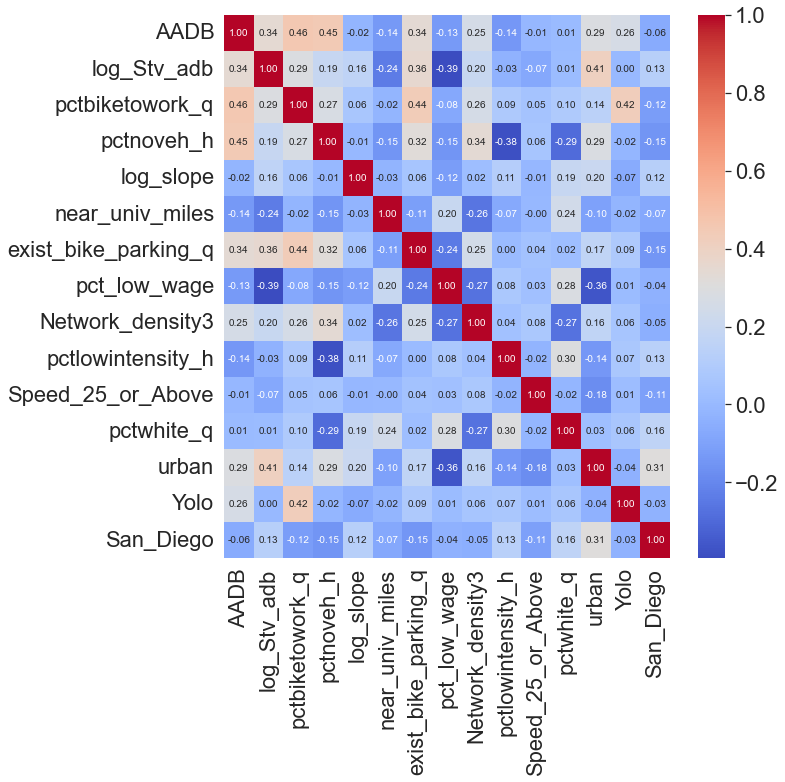

In [41]:
import seaborn as sb
plt.figure(figsize=(10,10))
corr = cor_df.corr()
sb.heatmap(corr, cmap="coolwarm", annot=True,fmt=".2f",annot_kws={"fontsize":10})

# Make some sns pair plot

In [42]:
df1=cor_df[['AADB','log_Stv_adb','pctbiketowork_q','pctnoveh_h']]

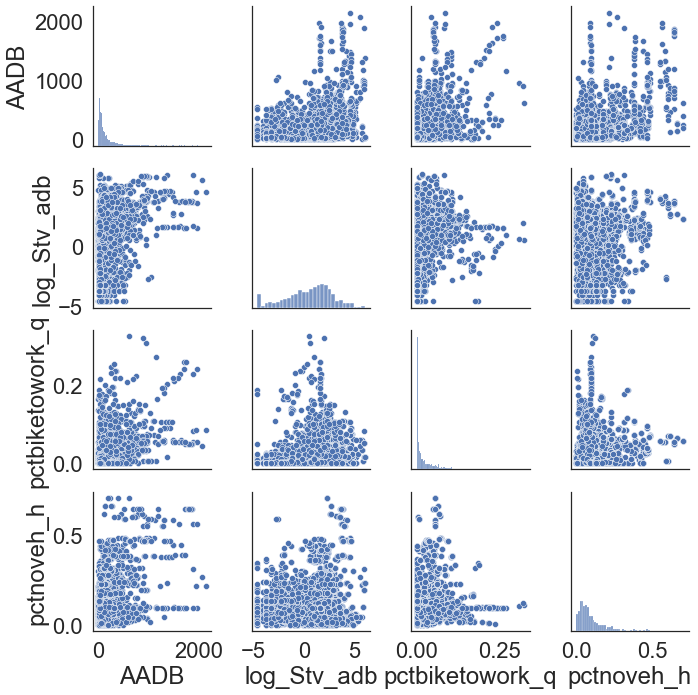

In [43]:
sns.pairplot(df1)

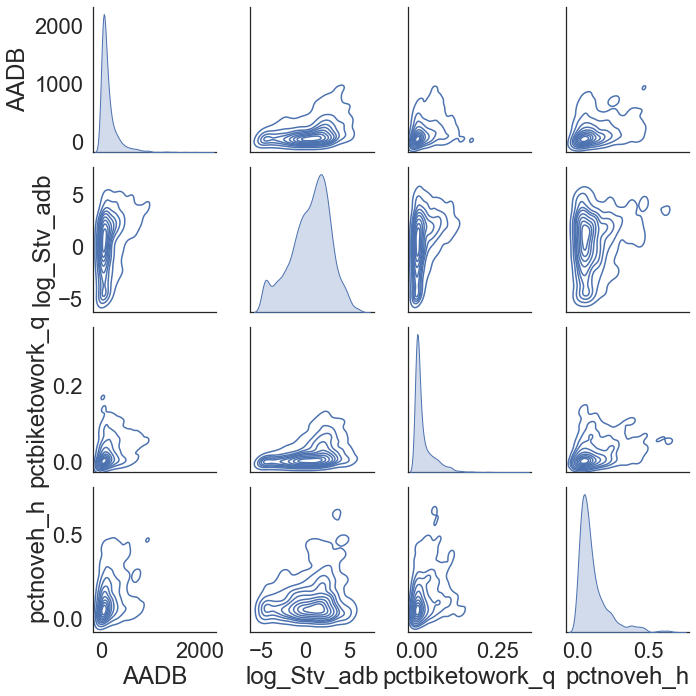

In [44]:
sns.pairplot(df1, kind="kde")

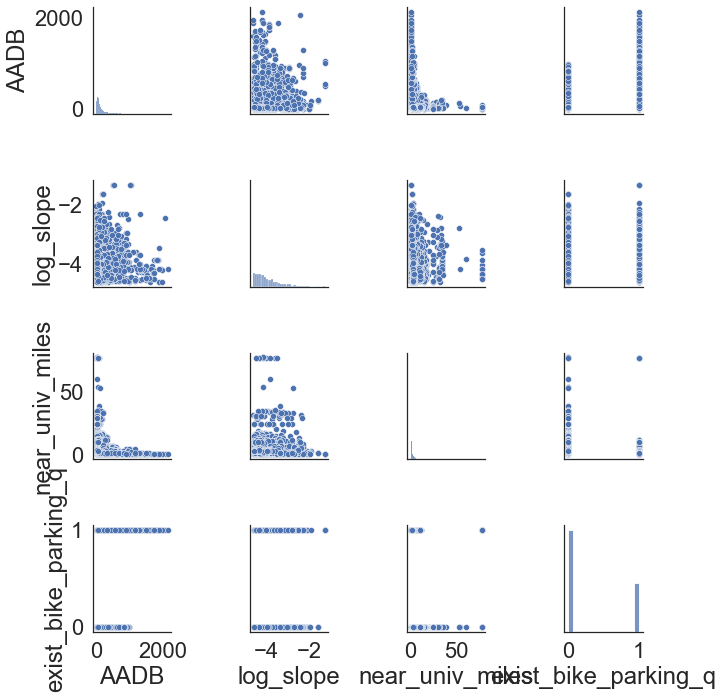

In [45]:
df2=cor_df[['AADB','log_slope','near_univ_miles','exist_bike_parking_q']]
sns.pairplot(df2)

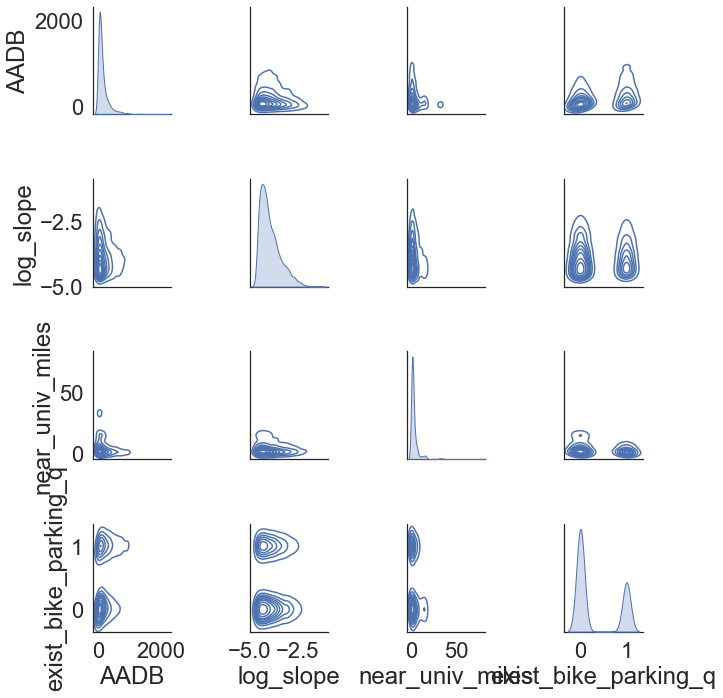

In [46]:
df2=cor_df[['AADB','log_slope','near_univ_miles','exist_bike_parking_q']]
sns.pairplot(df2, kind="kde")

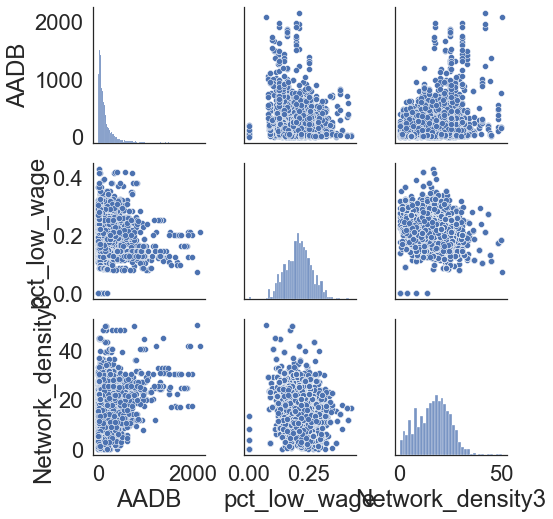

In [47]:
df3=cor_df[['AADB','pct_low_wage','Network_density3']]
sns.pairplot(df3)

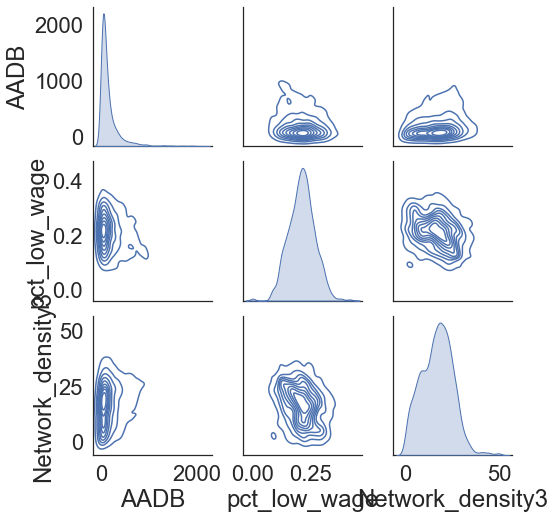

In [48]:
df3=cor_df[['AADB','pct_low_wage','Network_density3']]
sns.pairplot(df3, kind="kde")

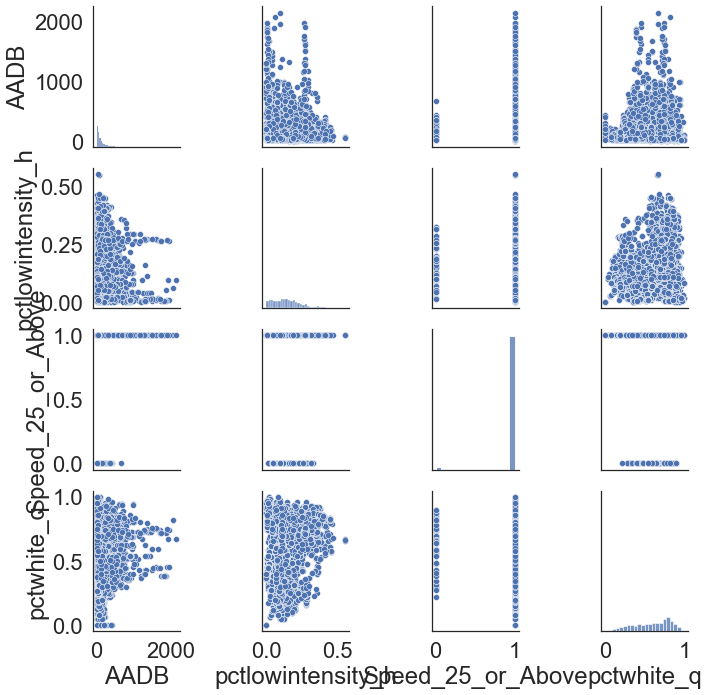

In [49]:
df4=cor_df[['AADB','pctlowintensity_h','Speed_25_or_Above','pctwhite_q']]
sns.pairplot(df4)

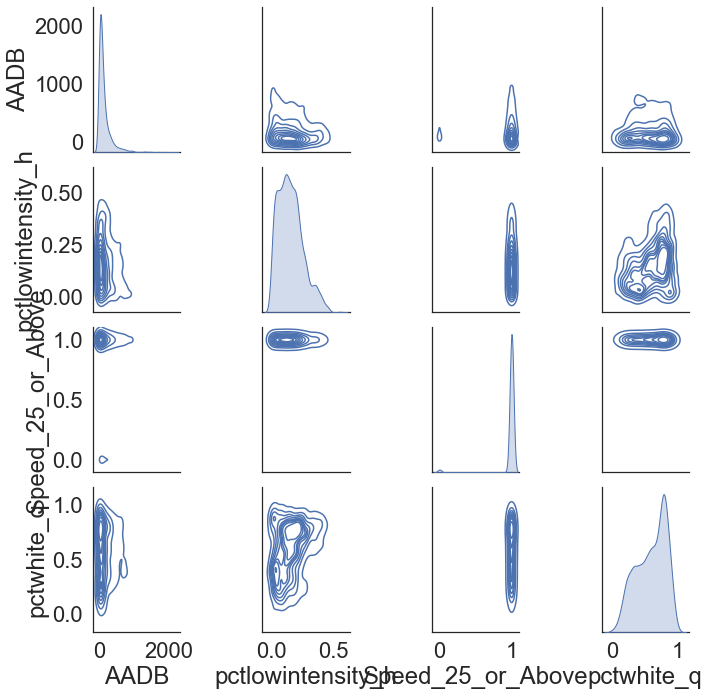

In [50]:
df4=cor_df[['AADB','pctlowintensity_h','Speed_25_or_Above','pctwhite_q']]
sns.pairplot(df4, kind="kde")

# select the Variables based on having correlation>0.20 and  VIF<=5

In [51]:
# keep only nymeric data
data2=data1._get_numeric_data()
data2.shape, data1.shape

((4202, 203), (4202, 215))

In [52]:
list(data2.columns)

['Unnamed: 0',
 'X',
 'ID',
 'Lat',
 'Long',
 'year',
 'ATT',
 'no_of_months_data_collected',
 'AADB',
 'ATT.in.Million',
 'matched_seg_id',
 'segment_id',
 'tdg_id',
 'lrs_cal_id',
 'bikes_proh',
 'int_tdg_id',
 'loc_id',
 'seg_counter',
 'fc_draft',
 'speed',
 'slope',
 'empnum_density_t',
 'geom_length',
 'adt_amt',
 'truck_adt_amt',
 'rt_lanes_amt',
 'lt_lanes_amt',
 'rt_trav_way_width',
 'rt_i_shd_tot_width',
 'rt_o_shd_tot_width',
 'lt_trav_way_width',
 'lt_i_shd_tot_width',
 'lt_o_shd_tot_width',
 'near_strava_id',
 'empnum_density_q',
 'empnum_density_h',
 'near_univ_miles',
 'near_large_univ_miles',
 'forward_trip_count',
 'reverse_trip_count',
 'forward_commute_trip_count',
 'reverse_commute_trip_count',
 'forward_leisure_trip_count',
 'reverse_leisure_trip_count',
 'forward_average_speed',
 'reverse_average_speed',
 'index',
 'ATT.in.Thousands',
 'rowIndex',
 'primary',
 'secondary',
 'tertiary',
 'residential',
 'trunk',
 'secondary_link',
 'unclassified',
 'speed_0_25',
 '

In [53]:
data3=data2.drop(['X',
 'ID',
 'Lat',
 'Long',
 'year',
 'ATT',
 'no_of_months_data_collected','ATT.in.Million',
 'matched_seg_id',
 'segment_id',
 'tdg_id',
 'lrs_cal_id',
 'bikes_proh',
 'int_tdg_id',
 'loc_id',
 'seg_counter',
 'fc_draft','geom_length','near_strava_id','index',
 'ATT.in.Thousands',
 'rowIndex', 'speed_0_25',
 'speed_21_35','Mean',
 'std',
 'outlier','primary',
 'secondary',
 'tertiary',
 'residential',
 'trunk',
 'secondary_link',
 'unclassified','Unnamed: 0','path','adt_amt',
 'truck_adt_amt',
 'rt_i_shd_tot_width',
 'rt_o_shd_tot_width',
 'lt_i_shd_tot_width', 'forward_trip_count',
 'reverse_commute_trip_count',
 'reverse_leisure_trip_count',
 'reverse_average_speed','Freeway','dist_ferry','exist_ferry_t','exist_ferry_q','exist_ferry_h', 'bgarea_t',
 'bgcliparea_t',
 'pctofbgarea_t', 'bgarea_q',
 'bgcliparea_q',
 'pctofbgarea_q', 'bgarea_h',
 'bgcliparea_h',
 'pctofbgarea_h', 'rt_lanes_amt',
 'lt_o_shd_tot_width','rt_lanes_amt',
 'lt_o_shd_tot_width','reverse_trip_count',
 'forward_leisure_trip_count',
 'forward_average_speed','lt_lanes_amt','rt_trav_way_width','lt_trav_way_width','forward_commute_trip_count','forward_commute_trip_count', 'Stv_commute_adb',
 'Stv_leisure_adb','Stv_adb','log_Stv_commute_adb',
 'log_Stv_leisure_adb'], axis=1)

In [54]:
data3.shape

(4202, 130)

In [55]:
corrMatrix1 = data3.corr()
low_corr_features = corrMatrix1.index[abs(corrMatrix1["AADB"])<=0.20]
low_corr_features

Index(['speed', 'slope', 'near_univ_miles', 'near_large_univ_miles',
       'speed_greater_than_35', 'Stv_Ave_speed', 'bike_lane', 'bike_route',
       'cycle_track', 'trail', 'Interstate', 'Principal_Arterial',
       'Minor_Arterial', 'Major_Collector', 'Minor_Collector', 'Local',
       'dist_subway', 'dist_amtrak', 'dist_busstop', 'exist_subway_t',
       'exist_amtrak_t', 'exist_busstop_t', 'exist_subway_q', 'exist_amtrak_q',
       'exist_busstop_q', 'exist_amtrak_h', 'exist_busstop_h', 'pct_low_wage',
       'pct_med_wage', 'pct_high_wage', 'Network_density1', 'Network_density2',
       'Intersection_density2', 'Intersection_density3',
       'Intersection_density41', 'Jobs_45min_auto_tt',
       'Population_45min_auto_tt', 'Population_accessibility_auto_1',
       'Population_accessibility_auto2', 'Central_index_auto2',
       'Population_accessibility_transit1', 'Central_index_transit1',
       'Population_accessibility_transit2', 'Central_index_transit2',
       'pctopenspace

In [56]:
corrMatrix1 = data3.corr()
top_corr_features = corrMatrix1.index[abs(corrMatrix1["AADB"])>0.20]
top_corr_features

Index(['AADB', 'empnum_density_t', 'empnum_density_q', 'empnum_density_h',
       'exist_bike_parking_t', 'exist_bike_parking_q', 'exist_subway_h',
       'exist_bike_parking_h', 'Residential_density',
       'Total_road_Network_density', 'Network_density3',
       'Street_Intersection_density', 'Intersection_density1',
       'Intersection_density5', 'Jobs_45min_transit_commute',
       'Population_45min_transit_commute', 'Central_index_auto1',
       'pcthighintensity_t', 'pcthighintensity_q', 'pcthighintensity_h',
       'totwhitepersqmi_t', 'pctbiketowork_t', 'totbiketoworkpersqmi_t',
       'pctatleastbachelors_t', 'totatleastbachelorspersqmi_t', 'pctnoveh_t',
       'totnovehpersqmi_t', 'popdensitysqmi_t', 'hshlddensitysqmi_t',
       'totwhitepersqmi_q', 'pctbiketowork_q', 'totbiketoworkpersqmi_q',
       'pctatleastbachelors_q', 'totatleastbachelorspersqmi_q', 'pctnoveh_q',
       'totnovehpersqmi_q', 'popdensitysqmi_q', 'hshlddensitysqmi_q',
       'totwhitepersqmi_h', 'pctbik

In [57]:
data4=data3[top_corr_features]
list(data4.columns)

['AADB',
 'empnum_density_t',
 'empnum_density_q',
 'empnum_density_h',
 'exist_bike_parking_t',
 'exist_bike_parking_q',
 'exist_subway_h',
 'exist_bike_parking_h',
 'Residential_density',
 'Total_road_Network_density',
 'Network_density3',
 'Street_Intersection_density',
 'Intersection_density1',
 'Intersection_density5',
 'Jobs_45min_transit_commute',
 'Population_45min_transit_commute',
 'Central_index_auto1',
 'pcthighintensity_t',
 'pcthighintensity_q',
 'pcthighintensity_h',
 'totwhitepersqmi_t',
 'pctbiketowork_t',
 'totbiketoworkpersqmi_t',
 'pctatleastbachelors_t',
 'totatleastbachelorspersqmi_t',
 'pctnoveh_t',
 'totnovehpersqmi_t',
 'popdensitysqmi_t',
 'hshlddensitysqmi_t',
 'totwhitepersqmi_q',
 'pctbiketowork_q',
 'totbiketoworkpersqmi_q',
 'pctatleastbachelors_q',
 'totatleastbachelorspersqmi_q',
 'pctnoveh_q',
 'totnovehpersqmi_q',
 'popdensitysqmi_q',
 'hshlddensitysqmi_q',
 'totwhitepersqmi_h',
 'pctbiketowork_h',
 'totbiketoworkpersqmi_h',
 'pctatleastbachelors_h',


In [58]:
data4.shape

(4202, 51)

In [59]:
%%time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X_dataf = data4.drop(["AADB",'pctnoveh_t','pctnoveh_q','totnovehpersqmi_h'], axis=1)

while True:
#     # Check the VIF for further filter of the data
# # calculating VIF for each feature
    #X_dataf.replace(0, 1)
    X = add_constant(X_dataf)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(len(X.columns))]
    vif_data=vif_data[1:]
    if vif_data['VIF'].max()<=5:
        break
    vif_data=vif_data.drop([vif_data['VIF'].idxmax()],axis='index')
    X_dataf = data4[vif_data['feature'].tolist()]
vif_data.sort_values('VIF')

CPU times: total: 31.3 s
Wall time: 8.16 s


feature       VIF
21                              Yolo  1.371084
9              Intersection_density1  1.431296
12               Central_index_auto1  1.564172
5                     exist_subway_h  1.582200
22                       log_Stv_adb  1.864859
19                             urban  2.251364
18             pctatleastbachelors_h  2.322854
3               exist_bike_parking_t  2.380524
17                   pctbiketowork_h  2.459940
10             Intersection_density5  2.529923
11  Population_45min_transit_commute  2.590570
8        Street_Intersection_density  2.631651
1                   empnum_density_t  2.642221
13                pcthighintensity_t  2.662176
20                     San_Francisco  2.799597
6               exist_bike_parking_h  2.943013
7                Residential_density  3.080184
2                   empnum_density_h  3.248458
14                 totwhitepersqmi_t  3.409265
16                 totnovehpersqmi_q  3.487316
15            totbiketoworkpersqmi_t  3.533211
4               exist_bike_parking_q  3.846359

In [60]:
vif_data.shape

(22, 2)

In [61]:
list(vif_data['feature'])

['empnum_density_t',
 'empnum_density_h',
 'exist_bike_parking_t',
 'exist_bike_parking_q',
 'exist_subway_h',
 'exist_bike_parking_h',
 'Residential_density',
 'Street_Intersection_density',
 'Intersection_density1',
 'Intersection_density5',
 'Population_45min_transit_commute',
 'Central_index_auto1',
 'pcthighintensity_t',
 'totwhitepersqmi_t',
 'totbiketoworkpersqmi_t',
 'totnovehpersqmi_q',
 'pctbiketowork_h',
 'pctatleastbachelors_h',
 'urban',
 'San_Francisco',
 'Yolo',
 'log_Stv_adb']

# Now select the Independent variables that have correlation less than 0.50 among them


In [62]:
data6=data[list(vif_data['feature'])]

In [63]:
# subsequently remove the variables untill mutual correlation is 0.50
data7=data2[['AADB','empnum_density_t',
 'exist_bike_parking_q',
 'Intersection_density5',
 'pctnoveh_h',
 'pctbiketowork_h',
 'urban',
 'Yolo',
 'log_Stv_adb']]

In [64]:
data7.describe()

AADB  empnum_density_t  exist_bike_parking_q  \
count  4202.000000       4202.000000           4202.000000   
mean    161.681818      13006.958556              0.324607   
std     233.171237      32449.995974              0.468284   
min       1.000000          0.000000              0.000000   
25%      38.000000       1018.591636              0.000000   
50%      82.000000       4472.253901              0.000000   
75%     180.000000      11904.789740              1.000000   
max    2142.000000     506080.888000              1.000000   

       Intersection_density5   pctnoveh_h  pctbiketowork_h        urban  \
count            4202.000000  4202.000000      4202.000000  4202.000000   
mean               36.819569     0.110289         0.021563     0.146597   
std                42.102111     0.110439         0.032630     0.353746   
min                 0.000000     0.000000         0.000000     0.000000   
25%                 7.036870     0.039722         0.000533     0.000000   
50%                20.706855     0.073375         0.007524     0.000000   
75%                53.010145     0.138728         0.028676     0.000000   
max               240.032299     0.702395         0.283880     1.000000   

              Yolo  log_Stv_adb  
count  4202.000000  4202.000000  
mean      0.010233     0.518934  
std       0.100652     2.261686  
min       0.000000    -4.605170  
25%       0.000000    -0.865220  
50%       0.000000     0.849624  
75%       0.000000     2.121326  
max       1.000000     6.042396

<AxesSubplot:>

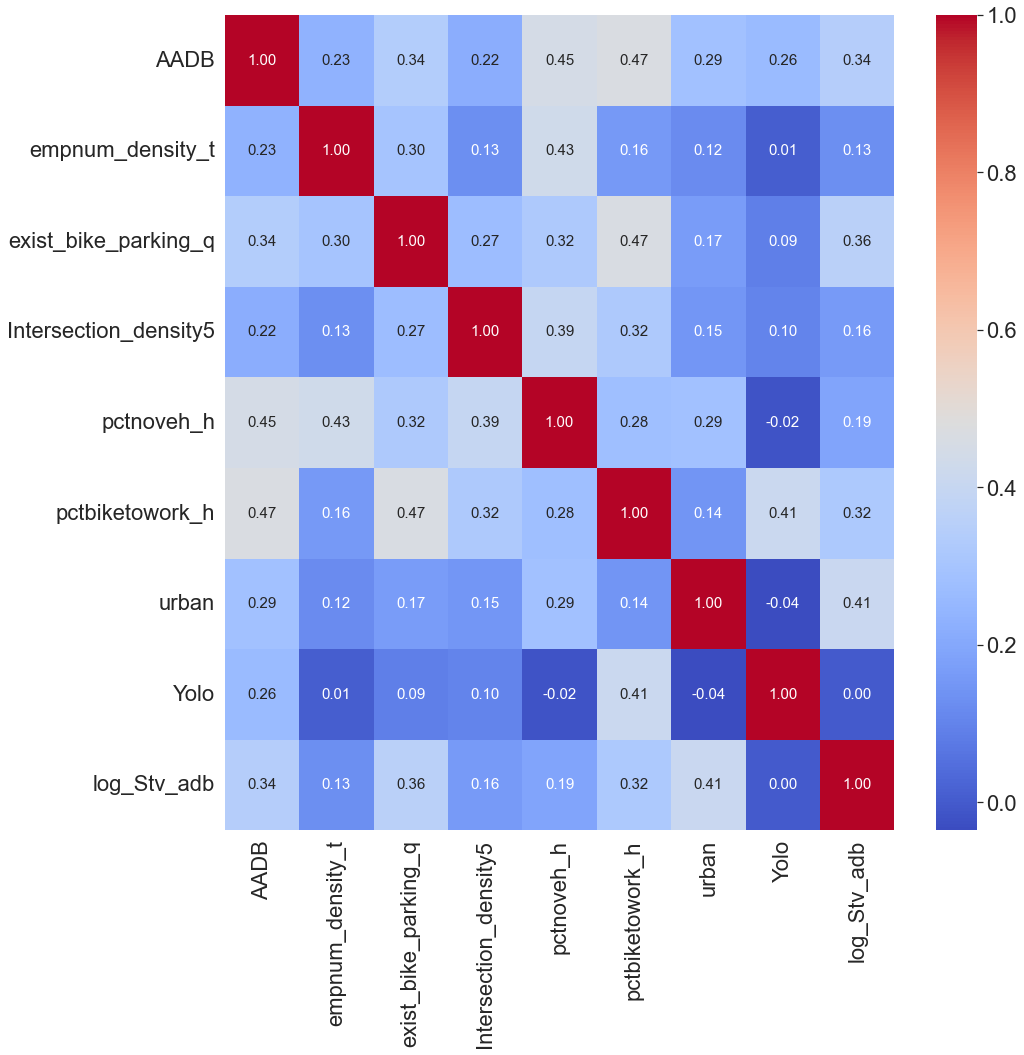

In [65]:
# Allow the mutual correlation upto 0.50
import seaborn as sb
plt.figure(figsize=(15,15))
corr = data7.corr()
sb.heatmap(corr, cmap="coolwarm", annot=True,fmt=".2f",annot_kws={"fontsize":15})

# Run the linear Regression Model

In [66]:
data7.columns

Index(['AADB', 'empnum_density_t', 'exist_bike_parking_q',
       'Intersection_density5', 'pctnoveh_h', 'pctbiketowork_h', 'urban',
       'Yolo', 'log_Stv_adb'],
      dtype='object')

In [67]:
track=data[['tdg_id','Leg','county', 'year','AADB']]
track['index']=track.index
track.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_10444\85145297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track['index']=track.index


tdg_id  Leg   county    year   AADB  index
0  208578.0  NaN  Alameda  2018.0   31.0      0
1  214389.0  NaN  Alameda  2017.0  191.0      1
2  214389.0  NaN  Alameda  2018.0  214.0      2
3  214389.0  NaN  Alameda  2019.0  210.0      3
4  214389.0  NaN  Alameda  2016.0  152.0      4

In [68]:
# Now we do 10fold cv for our NB:
LR_df=data7
num_folds = 10

kfold = KFold(n_splits=10, shuffle=True, random_state=94706)

# Now we perform KFold:

fold_num = 1
lr_MAPE_train = []
lr_MAPE_scores = []
lr_RMSE_train = []
lr_RMSE_scores = []
lr_MAE_train = []
lr_MAE_scores = []
lr_R2_train = []
lr_R2_scores = []

lr_low_MAPE_scores = []
lr_low_RMSE_scores = []
lr_low_MAE_scores = []
lr_low_R2_scores = []

lr_med_MAPE_scores = []
lr_med_RMSE_scores = []
lr_med_MAE_scores = []
lr_med_R2_scores = []

lr_high_MAPE_scores = []
lr_high_RMSE_scores = []
lr_high_MAE_scores = []
lr_high_R2_scores = []
test_pred = []

# we split the entire dataframe:
for train, test in kfold.split(LR_df):
    LR_CV_model = smf.ols(formula = 'AADB ~log_Stv_adb+exist_bike_parking_q+urban+pctnoveh_h+pctbiketowork_h+Intersection_density5+Yolo', data=LR_df.iloc[train],).fit(cov_type='HC3', use_t=True)
    train_predictions = LR_CV_model.predict(LR_df.iloc[train])
    test_predictions = LR_CV_model.predict(LR_df.iloc[test])
    predictions_lr = pd.DataFrame([LR_df.iloc[test].index,LR_CV_model.predict(LR_df.iloc[test]),LR_df.iloc[test]]).transpose()
    train_mae = mean_absolute_error(LR_df.iloc[train]['AADB'], train_predictions)
    lr_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(LR_df.iloc[test]['AADB'], test_predictions)
    lr_MAE_scores.append(test_mae)
    train_rmse = math.sqrt(mean_squared_error(LR_df.iloc[train]['AADB'], train_predictions))
    lr_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(LR_df.iloc[test]['AADB'], test_predictions))
    lr_RMSE_scores.append(test_rmse)
    train_mape = mean_absolute_percentage_error(LR_df.iloc[train]['AADB'], train_predictions)
    lr_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(LR_df.iloc[test]['AADB'], test_predictions)
    lr_MAPE_scores.append(test_mape)
    train_r2 = r2_score(LR_df.iloc[train]['AADB'], train_predictions)
    lr_R2_train.append(train_r2)
    score_r2 = r2_score(LR_df.iloc[test]['AADB'], test_predictions)
    lr_R2_scores.append(score_r2)
    test_pred.append(predictions_lr)
    appended_data_lr = pd.concat(test_pred)
    
        # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([LR_df.iloc[test]['AADB'] >= 0, LR_df.iloc[test]['AADB'] <=100], axis=0)
    med_Y_test_mask = np.all([LR_df.iloc[test]['AADB'] >= 101, LR_df.iloc[test]['AADB'] <=300], axis=0)
    high_Y_test_mask = np.all([LR_df.iloc[test]['AADB'] >= 301],axis=0)
   
    lr_low_MAPE_scores.append(mean_absolute_percentage_error(LR_df.iloc[test]['AADB'] [low_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][low_Y_test_mask])))
    lr_low_RMSE_scores.append(math.sqrt(mean_squared_error(LR_df.iloc[test]['AADB'] [low_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][low_Y_test_mask]))))
    lr_low_MAE_scores.append(mean_absolute_error(LR_df.iloc[test]['AADB'] [low_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][low_Y_test_mask])))
    lr_low_R2_scores.append(r2_score(LR_df.iloc[test]['AADB'] [low_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][low_Y_test_mask])))

    lr_med_MAPE_scores.append(mean_absolute_percentage_error(LR_df.iloc[test]['AADB'] [med_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][med_Y_test_mask])))
    lr_med_RMSE_scores.append(math.sqrt(mean_squared_error(LR_df.iloc[test]['AADB'] [med_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][med_Y_test_mask]))))
    lr_med_MAE_scores.append(mean_absolute_error(LR_df.iloc[test]['AADB'] [med_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][med_Y_test_mask])))
    lr_med_R2_scores.append(r2_score(LR_df.iloc[test]['AADB'] [med_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][med_Y_test_mask])))

    lr_high_MAPE_scores.append(mean_absolute_percentage_error(LR_df.iloc[test]['AADB'] [high_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][high_Y_test_mask])))
    lr_high_RMSE_scores.append(math.sqrt(mean_squared_error(LR_df.iloc[test]['AADB'] [high_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][high_Y_test_mask]))))
    lr_high_MAE_scores.append(mean_absolute_error(LR_df.iloc[test]['AADB'] [high_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][high_Y_test_mask])))
    lr_high_R2_scores.append(r2_score(LR_df.iloc[test]['AADB'] [med_Y_test_mask], LR_CV_model.predict(LR_df.iloc[test][med_Y_test_mask])))
    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={LR_df.iloc[test][low_Y_test_mask].shape[0]}), MED (n={LR_df.iloc[test][med_Y_test_mask].shape[0]}), HIGH (n={LR_df.iloc[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {lr_low_MAE_scores[-1]}\tMed Loss: {lr_med_MAE_scores[-1]}\tHigh Loss: {lr_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {lr_low_RMSE_scores[-1]}\tMed RMSE: {lr_med_RMSE_scores[-1]}\tHigh RMSE: {lr_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {lr_low_MAPE_scores[-1]}\tMed MAPE: {lr_med_MAPE_scores[-1]}\tHigh MAPE: {lr_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {lr_low_R2_scores[-1]}\tMed R2: {lr_med_R2_scores[-1]}\tHigh R2: {lr_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(lr_low_MAE_scores)} +/- {np.std(lr_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(lr_low_RMSE_scores)} +/- {np.std(lr_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(lr_low_MAPE_scores)} +/- {np.std(lr_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(lr_low_R2_scores)} +/- {np.std(lr_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(lr_med_MAE_scores)} +/- {np.std(lr_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(lr_med_RMSE_scores)} +/- {np.std(lr_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(lr_med_MAPE_scores)} +/- {np.std(lr_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(lr_med_R2_scores)} +/- {np.std(lr_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(lr_high_MAE_scores)} +/- {np.std(lr_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(lr_high_RMSE_scores)} +/- {np.std(lr_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(lr_high_MAPE_scores)} +/- {np.std(lr_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(lr_high_R2_scores)} +/- {np.std(lr_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(lr_MAE_scores)} +/- {np.std(lr_MAE_scores)}")
print(f"Overall RMSE: {np.mean(lr_RMSE_scores)} +/- {np.std(lr_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(lr_MAPE_scores)} +/- {np.std(lr_MAPE_scores)}")
print(f"Overall R2: {np.mean(lr_R2_scores)} +/- {np.std(lr_R2_scores)}\n\n")


print("Delimited table for Linear Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (lr_MAPE_train[i], lr_MAPE_scores[i], lr_RMSE_train[i], lr_RMSE_scores[i], lr_MAE_train[i], lr_MAE_scores[i], lr_R2_train[i], lr_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(lr_MAPE_train), np.mean(lr_MAPE_scores), np.mean(lr_RMSE_train),
      np.mean(lr_RMSE_scores), np.mean(lr_MAE_train), np.mean(lr_MAE_scores), np.mean(lr_R2_train), np.mean(lr_R2_scores)))     

------------------------------------------Fold 1------------------------------------------
	Train MAE: 110.94000895388876	Score Loss: 119.92340225227515
	Train RMSE: 179.67191304853955	Score RMSE: 202.62025560223086
	Train MAPE: 202.42044898951193	Score MAPE: 194.62242949167364
	Train R2:   0.3965260088275695	Score R2: 0.33876390448971316

	3-VOLUME SCORES: LOW (n=246), MED (n=119), HIGH (n=56), TOTAL IN FOLD (n=421)
	Low Loss: 71.2891695625537	Med Loss: 96.99786154123237	High Loss: 382.2834127216605
	Low RMSE: 103.82257857242799	Med RMSE: 124.42611985216526	High RMSE: 477.90717155199303
	Low MAPE: 290.7868947097523	Med MAPE: 61.37774678119554	High MAPE: 55.330622329165216
	Low R2:   -17.362180338463062	Med R2: -3.9055771012198877	High R2: -3.9055771012198877
------------------------------------------Fold 2------------------------------------------
	Train MAE: 113.46026094756198	Score Loss: 107.47737895632217
	Train RMSE: 183.4039352494163	Score RMSE: 170.11656839681584
	Train MAPE: 20

In [69]:
LR_CV_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AADB   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     99.09
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.38e-133
Time:                        11:48:50   Log-Likelihood:                -25001.
No. Observations:                3782   AIC:                         5.002e+04
Df Residuals:                    3774   BIC:                         5.007e+04
Df Model:                           7                                         
Covariance Type:                  HC3                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                30.4587      5.015      6.073      0.000      20.626      40.292
log_Stv_adb              16.0187      1.442     11.106      0.000      13.191      18.846
exist_bike_parking_q     27.6324      7.172      3.853      0.000      13.571      41.693
urban                    64.9613     12.845      5.057      0.000      39.777      90.145
pctnoveh_h              696.7618     55.949     12.453      0.000     587.068     806.456
pctbiketowork_h        1591.9756    181.844      8.755      0.000    1235.454    1948.497
Intersection_density5    -0.3141      0.120     -2.619      0.009      -0.549      -0.079
Yolo                    473.7356     95.858      4.942      0.000     285.797     661.674
==============================================================================
Omnibus:                     2114.530   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32403.386
Skew:                           2.334   Prob(JB):                         0.00
Kurtosis:                      16.559   Cond. No.                     2.30e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
lr_data=appended_data_lr.rename(columns = {0:'Index_ID',1:'Mean Predicted AADB',2:'Observed AADB'})
LR_data1=lr_data.groupby('Index_ID').mean()
graph_lr_data=pd.merge(track,LR_data1,left_on='index', right_on='Index_ID', how="inner")
# graph_data['Mean Predicted AADB in Million']=graph_data['Mean Predicted AADB']
# graph_data['Observed AADB in Million']=graph_data['Observed AADB']
graph_lr_data.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_10444\3776180396.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  LR_data1=lr_data.groupby('Index_ID').mean()


tdg_id  Leg   county    year   AADB  index  Mean Predicted AADB
0  208578.0  NaN  Alameda  2018.0   31.0      0           315.994427
1  214389.0  NaN  Alameda  2017.0  191.0      1            76.159613
2  214389.0  NaN  Alameda  2018.0  214.0      2            61.110814
3  214389.0  NaN  Alameda  2019.0  210.0      3            70.646435
4  214389.0  NaN  Alameda  2016.0  152.0      4            69.595360

In [71]:
graph_lr_data['Mean Predicted AADB'].describe()

count    4202.000000
mean      161.832421
std       146.102686
min       -56.162193
25%        66.756909
50%       116.557037
75%       231.503784
max      1064.091673
Name: Mean Predicted AADB, dtype: float64

In [72]:
graph_lr_data['AADB'].describe()

count    4202.000000
mean      161.681818
std       233.171237
min         1.000000
25%        38.000000
50%        82.000000
75%       180.000000
max      2142.000000
Name: AADB, dtype: float64

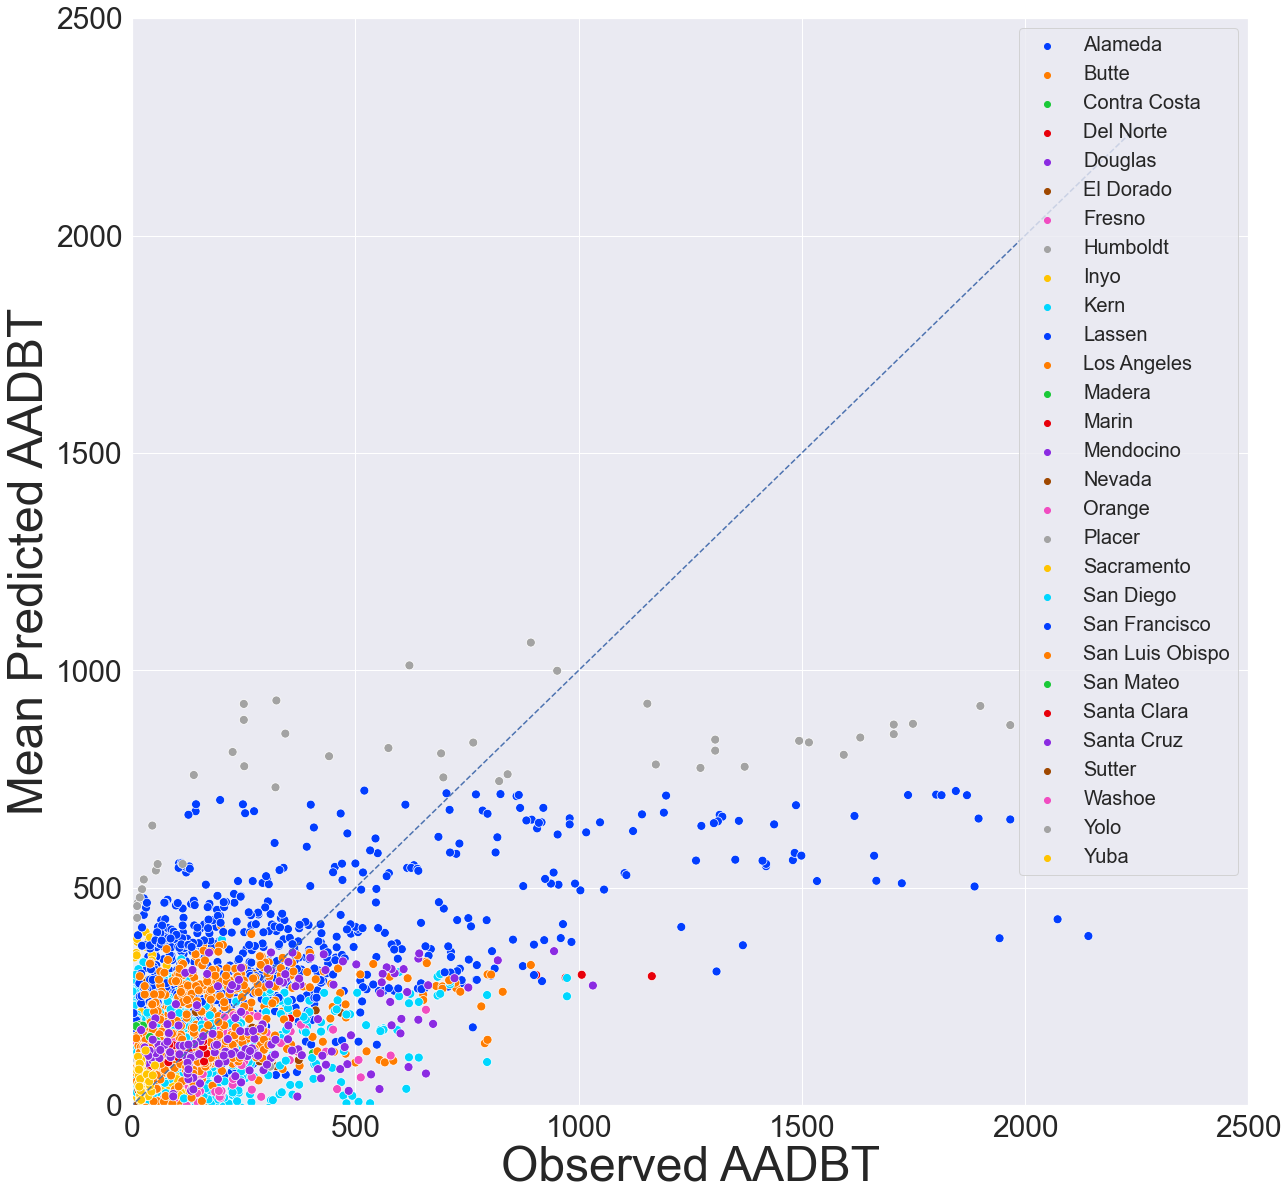

In [73]:
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=graph_lr_data, x="AADB", y="Mean Predicted AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Observed AADBT', ylabel='Mean Predicted AADBT')
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,2500)
plt.ylim(0,2500)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Run Poisson Regression Model

In [74]:
#formula_str='AADB ~log_Stv_adb+exist_bike_parking_q+pctnoveh_h+pctbiketowork_h+Yolo'
formula_str='AADB ~log_Stv_adb+exist_bike_parking_q+pctnoveh_h+pctbiketowork_h+Intersection_density5+Yolo'
#formula_str='AADB ~pctnoveh_t+urban+Yolo'

In [75]:
# track_nb=data[['tdg_id','Leg','county', 'year','AADB']]
# track_nb['index']=track_nb.index
# track_nb.head()

In [76]:
 pd.Series(pd.qcut(data7.AADB,3).value_counts())

(0.999, 51.0]      1417
(136.0, 2142.0]    1399
(51.0, 136.0]      1386
Name: AADB, dtype: int64

In [77]:
low=data7.loc[data7['AADB']<=100]
mid=data7[(data7['AADB']>100) & (data7['AADB']<=300)]
high=data7.loc[data7['AADB']>300]
low.shape, mid.shape, high.shape

((2385, 9), (1227, 9), (590, 9))

In [78]:
# Now we do 10fold cv for our PR:
PR_df=data7
num_folds = 10

kfold = KFold(n_splits=10, shuffle=True, random_state=94706)

# Now we perform KFold:

fold_num = 1
nb_MAPE_train = []
nb_MAPE_scores = []
nb_RMSE_train = []
nb_RMSE_scores = []
nb_MAE_train = []
nb_MAE_scores = []
nb_R2_train = []
nb_R2_scores = []

nb_low_MAPE_scores = []
nb_low_RMSE_scores = []
nb_low_MAE_scores = []
nb_low_R2_scores = []

nb_med_MAPE_scores = []
nb_med_RMSE_scores = []
nb_med_MAE_scores = []
nb_med_R2_scores = []

nb_high_MAPE_scores = []
nb_high_RMSE_scores = []
nb_high_MAE_scores = []
nb_high_R2_scores = []
test_pred = []

# we split the entire dataframe:
for train, test in kfold.split(PR_df):
    PR_CV_model = smf.glm(
        formula_str, data=PR_df.iloc[train], family=sm.families.Poisson()).fit(cov_type='HC3', use_t=True)

    train_predictions = PR_CV_model.predict(PR_df.iloc[train])
    test_predictions = PR_CV_model.predict(PR_df.iloc[test])
    predictions_pr = pd.DataFrame([PR_df.iloc[test].index,PR_CV_model.predict(PR_df.iloc[test]),PR_df.iloc[test]]).transpose()
    train_mae = mean_absolute_error(PR_df.iloc[train]['AADB'], train_predictions)
    nb_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(PR_df.iloc[test]['AADB'], test_predictions)
    nb_MAE_scores.append(test_mae)
    train_rmse = math.sqrt(mean_squared_error(PR_df.iloc[train]['AADB'], train_predictions))
    nb_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(PR_df.iloc[test]['AADB'], test_predictions))
    nb_RMSE_scores.append(test_rmse)
    train_mape = mean_absolute_percentage_error(PR_df.iloc[train]['AADB'], train_predictions)
    nb_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(PR_df.iloc[test]['AADB'], test_predictions)
    nb_MAPE_scores.append(test_mape)
    train_r2 = r2_score(PR_df.iloc[train]['AADB'], train_predictions)
    nb_R2_train.append(train_r2)
    score_r2 = r2_score(PR_df.iloc[test]['AADB'], test_predictions)
    nb_R2_scores.append(score_r2)
    test_pred.append(predictions_pr)
    appended_data_pr = pd.concat(test_pred)
        # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([PR_df.iloc[test]['AADB'] >= 0, PR_df.iloc[test]['AADB'] <=100], axis=0)
    med_Y_test_mask = np.all([PR_df.iloc[test]['AADB'] >= 101, PR_df.iloc[test]['AADB'] <=300], axis=0)
    high_Y_test_mask = np.all([PR_df.iloc[test]['AADB'] >= 301],axis=0)
   
    nb_low_MAPE_scores.append(mean_absolute_percentage_error(PR_df.iloc[test]['AADB'] [low_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][low_Y_test_mask])))
    nb_low_RMSE_scores.append(math.sqrt(mean_squared_error(PR_df.iloc[test]['AADB'] [low_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][low_Y_test_mask]))))
    nb_low_MAE_scores.append(mean_absolute_error(PR_df.iloc[test]['AADB'] [low_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][low_Y_test_mask])))
    nb_low_R2_scores.append(r2_score(PR_df.iloc[test]['AADB'] [low_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][low_Y_test_mask])))

    nb_med_MAPE_scores.append(mean_absolute_percentage_error(PR_df.iloc[test]['AADB'] [med_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][med_Y_test_mask])))
    nb_med_RMSE_scores.append(math.sqrt(mean_squared_error(PR_df.iloc[test]['AADB'] [med_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][med_Y_test_mask]))))
    nb_med_MAE_scores.append(mean_absolute_error(PR_df.iloc[test]['AADB'] [med_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][med_Y_test_mask])))
    nb_med_R2_scores.append(r2_score(PR_df.iloc[test]['AADB'] [med_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][med_Y_test_mask])))

    nb_high_MAPE_scores.append(mean_absolute_percentage_error(PR_df.iloc[test]['AADB'] [high_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][high_Y_test_mask])))
    nb_high_RMSE_scores.append(math.sqrt(mean_squared_error(PR_df.iloc[test]['AADB'] [high_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][high_Y_test_mask]))))
    nb_high_MAE_scores.append(mean_absolute_error(PR_df.iloc[test]['AADB'] [high_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][high_Y_test_mask])))
    nb_high_R2_scores.append(r2_score(PR_df.iloc[test]['AADB'] [med_Y_test_mask], PR_CV_model.predict(PR_df.iloc[test][med_Y_test_mask])))
    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={PR_df.iloc[test][low_Y_test_mask].shape[0]}), MED (n={PR_df.iloc[test][med_Y_test_mask].shape[0]}), HIGH (n={PR_df.iloc[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {nb_low_MAE_scores[-1]}\tMed Loss: {nb_med_MAE_scores[-1]}\tHigh Loss: {nb_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {nb_low_RMSE_scores[-1]}\tMed RMSE: {nb_med_RMSE_scores[-1]}\tHigh RMSE: {nb_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {nb_low_MAPE_scores[-1]}\tMed MAPE: {nb_med_MAPE_scores[-1]}\tHigh MAPE: {nb_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {nb_low_R2_scores[-1]}\tMed R2: {nb_med_R2_scores[-1]}\tHigh R2: {nb_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(nb_low_MAE_scores)} +/- {np.std(nb_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(nb_low_RMSE_scores)} +/- {np.std(nb_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(nb_low_MAPE_scores)} +/- {np.std(nb_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(nb_low_R2_scores)} +/- {np.std(nb_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(nb_med_MAE_scores)} +/- {np.std(nb_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(nb_med_RMSE_scores)} +/- {np.std(nb_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(nb_med_MAPE_scores)} +/- {np.std(nb_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(nb_med_R2_scores)} +/- {np.std(nb_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(nb_high_MAE_scores)} +/- {np.std(nb_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(nb_high_RMSE_scores)} +/- {np.std(nb_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(nb_high_MAPE_scores)} +/- {np.std(nb_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(nb_high_R2_scores)} +/- {np.std(nb_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(nb_MAE_scores)} +/- {np.std(nb_MAE_scores)}")
print(f"Overall RMSE: {np.mean(nb_RMSE_scores)} +/- {np.std(nb_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(nb_MAPE_scores)} +/- {np.std(nb_MAPE_scores)}")
print(f"Overall R2: {np.mean(nb_R2_scores)} +/- {np.std(nb_R2_scores)}\n\n")


print("Delimited table for Negative Binomial Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (nb_MAPE_train[i], nb_MAPE_scores[i], nb_RMSE_train[i], nb_RMSE_scores[i], nb_MAE_train[i], nb_MAE_scores[i], nb_R2_train[i], nb_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(nb_MAPE_train), np.mean(nb_MAPE_scores), np.mean(nb_RMSE_train),
      np.mean(nb_RMSE_scores), np.mean(nb_MAE_train), np.mean(nb_MAE_scores), np.mean(nb_R2_train), np.mean(nb_R2_scores)))     

------------------------------------------Fold 1------------------------------------------
	Train MAE: 100.64292506792152	Score Loss: 107.92485560828678
	Train RMSE: 164.7242969933365	Score RMSE: 186.00146709139716
	Train MAPE: 174.9346213765432	Score MAPE: 175.40659871248977
	Train R2:   0.4927599940426646	Score R2: 0.44278400490884184

	3-VOLUME SCORES: LOW (n=246), MED (n=119), HIGH (n=56), TOTAL IN FOLD (n=421)
	Low Loss: 60.16448286883109	Med Loss: 83.68305995661485	High Loss: 369.24316590212715
	Low RMSE: 78.44886579773082	Med RMSE: 116.55136752902595	High RMSE: 451.8747494662969
	Low MAPE: 262.2579002487769	Med MAPE: 51.74345172686925	High MAPE: 56.66542573681524
	Low R2:   -9.483685026271832	Med R2: -3.3042921083688297	High R2: -3.3042921083688297
------------------------------------------Fold 2------------------------------------------
	Train MAE: 102.42607373706123	Score Loss: 99.07733742785116
	Train RMSE: 167.47771939849204	Score RMSE: 160.277823813859
	Train MAPE: 179.1843

In [79]:
PR_CV_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   AADB   No. Observations:                 3782
Model:                            GLM   Df Residuals:                     3775
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.0833e+05
Date:                Mon, 11 Dec 2023   Deviance:                   3.9292e+05
Time:                        11:48:53   Pearson chi2:                 5.05e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC3                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.2825      0.027    157.383      0.000       4.229       4.336
log_Stv_adb               0.1621      0.012     13.595      0.000       0.139       0.185
exist_bike_parking_q      0.1745      0.039      4.450      0.000       0.098       0.251
pctnoveh_h                2.4479      0.130     18.856      0.000       2.193       2.702
pctbiketowork_h           6.6594      0.594     11.215      0.000       5.495       7.824
Intersection_density5    -0.0006      0.000     -1.360      0.174      -0.001       0.000
Yolo                      0.7582      0.127      5.982      0.000       0.510       1.007
=========================================================================================
"""

In [80]:
print(PR_CV_model.aic)

416668.6628768641


In [81]:
pr_data=appended_data_pr.rename(columns = {0:'Index_ID',1:'Mean Predicted AADB',2:'Observed AADB'})
PR_data1=pr_data.groupby('Index_ID').mean()
graph_pr_data=pd.merge(track,PR_data1,left_on='index', right_on='Index_ID', how="inner")
# graph_data['Mean Predicted AADB in Million']=graph_data['Mean Predicted AADB']
# graph_data['Observed AADB in Million']=graph_data['Observed AADB']
graph_pr_data.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_10444\205448054.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  PR_data1=pr_data.groupby('Index_ID').mean()


tdg_id  Leg   county    year   AADB  index  Mean Predicted AADB
0  208578.0  NaN  Alameda  2018.0   31.0      0           244.603848
1  214389.0  NaN  Alameda  2017.0  191.0      1            50.425624
2  214389.0  NaN  Alameda  2018.0  214.0      2            50.398702
3  214389.0  NaN  Alameda  2019.0  210.0      3            52.532315
4  214389.0  NaN  Alameda  2016.0  152.0      4            51.971623

In [82]:
graph_pr_data['Mean Predicted AADB'].describe()

count    4202.000000
mean      161.718191
std       157.233721
min        32.543923
25%        79.055294
50%       113.942779
75%       182.825592
max      2056.240366
Name: Mean Predicted AADB, dtype: float64

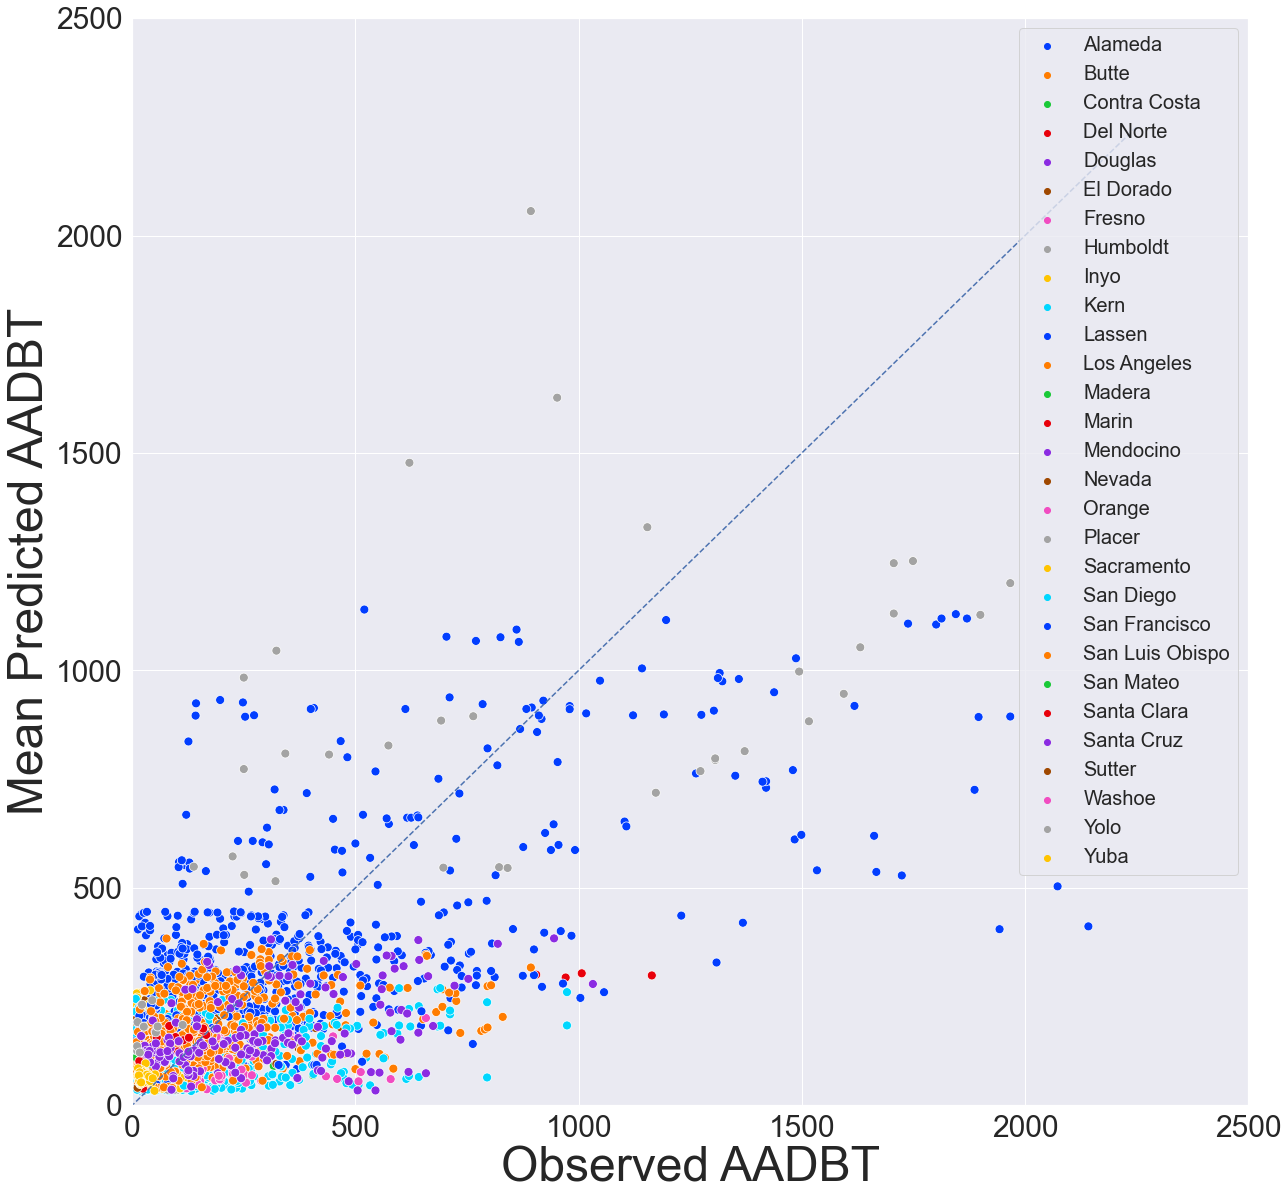

In [83]:
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=graph_pr_data, x="AADB", y="Mean Predicted AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Observed AADBT', ylabel='Mean Predicted AADBT')
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,2500)
plt.ylim(0,2500)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Run NB Model

In [84]:
data7.columns

Index(['AADB', 'empnum_density_t', 'exist_bike_parking_q',
       'Intersection_density5', 'pctnoveh_h', 'pctbiketowork_h', 'urban',
       'Yolo', 'log_Stv_adb'],
      dtype='object')

In [85]:
formula_str='AADB ~log_Stv_adb+exist_bike_parking_q+pctnoveh_h+pctbiketowork_h+urban+Yolo'

In [86]:
# Now we do 10fold cv for our NB:
NB_df=data1
num_folds = 10

kfold = KFold(n_splits=10, shuffle=True, random_state=94704)

# Now we perform KFold:

fold_num = 1
nb_MAPE_train = []
nb_MAPE_scores = []
nb_RMSE_train = []
nb_RMSE_scores = []
nb_MAE_train = []
nb_MAE_scores = []
nb_R2_train = []
nb_R2_scores = []

nb_low_MAPE_scores = []
nb_low_RMSE_scores = []
nb_low_MAE_scores = []
nb_low_R2_scores = []

nb_med_MAPE_scores = []
nb_med_RMSE_scores = []
nb_med_MAE_scores = []
nb_med_R2_scores = []

nb_high_MAPE_scores = []
nb_high_RMSE_scores = []
nb_high_MAE_scores = []
nb_high_R2_scores = []
test_pred = []

# we split the entire dataframe:
for train, test in kfold.split(NB_df):
    NB_CV_model = smf.glm(
        formula_str, data=NB_df.iloc[train], family=sm.families.NegativeBinomial()).fit(cov_type='HC3', use_t=True)

    train_predictions = NB_CV_model.predict(NB_df.iloc[train])
    test_predictions = NB_CV_model.predict(NB_df.iloc[test])
    predictions_nb = pd.DataFrame([NB_df.iloc[test].index,NB_CV_model.predict(NB_df.iloc[test]),NB_df.iloc[test]]).transpose()
    train_mae = mean_absolute_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAE_scores.append(test_mae)
    train_rmse = math.sqrt(mean_squared_error(NB_df.iloc[train]['AADB'], train_predictions))
    nb_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'], test_predictions))
    nb_RMSE_scores.append(test_rmse)
    train_mape = mean_absolute_percentage_error(NB_df.iloc[train]['AADB'], train_predictions)
    nb_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(NB_df.iloc[test]['AADB'], test_predictions)
    nb_MAPE_scores.append(test_mape)
    train_r2 = r2_score(NB_df.iloc[train]['AADB'], train_predictions)
    nb_R2_train.append(train_r2)
    score_r2 = r2_score(NB_df.iloc[test]['AADB'], test_predictions)
    nb_R2_scores.append(score_r2)
    test_pred.append(predictions_nb)
    appended_data_nb = pd.concat(test_pred)
    
        # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 0, NB_df.iloc[test]['AADB'] <=100], axis=0)
    med_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 101, NB_df.iloc[test]['AADB'] <=300], axis=0)
    high_Y_test_mask = np.all([NB_df.iloc[test]['AADB'] >= 301],axis=0)
   
    nb_low_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask]))))
    nb_low_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))
    nb_low_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [low_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][low_Y_test_mask])))

    nb_med_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask]))))
    nb_med_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    nb_med_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))

    nb_high_MAPE_scores.append(mean_absolute_percentage_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_RMSE_scores.append(math.sqrt(mean_squared_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask]))))
    nb_high_MAE_scores.append(mean_absolute_error(NB_df.iloc[test]['AADB'] [high_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][high_Y_test_mask])))
    nb_high_R2_scores.append(r2_score(NB_df.iloc[test]['AADB'] [med_Y_test_mask], NB_CV_model.predict(NB_df.iloc[test][med_Y_test_mask])))
    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={NB_df.iloc[test][low_Y_test_mask].shape[0]}), MED (n={NB_df.iloc[test][med_Y_test_mask].shape[0]}), HIGH (n={NB_df.iloc[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {nb_low_MAE_scores[-1]}\tMed Loss: {nb_med_MAE_scores[-1]}\tHigh Loss: {nb_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {nb_low_RMSE_scores[-1]}\tMed RMSE: {nb_med_RMSE_scores[-1]}\tHigh RMSE: {nb_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {nb_low_MAPE_scores[-1]}\tMed MAPE: {nb_med_MAPE_scores[-1]}\tHigh MAPE: {nb_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {nb_low_R2_scores[-1]}\tMed R2: {nb_med_R2_scores[-1]}\tHigh R2: {nb_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(nb_low_MAE_scores)} +/- {np.std(nb_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(nb_low_RMSE_scores)} +/- {np.std(nb_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(nb_low_MAPE_scores)} +/- {np.std(nb_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(nb_low_R2_scores)} +/- {np.std(nb_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(nb_med_MAE_scores)} +/- {np.std(nb_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(nb_med_RMSE_scores)} +/- {np.std(nb_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(nb_med_MAPE_scores)} +/- {np.std(nb_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(nb_med_R2_scores)} +/- {np.std(nb_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(nb_high_MAE_scores)} +/- {np.std(nb_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(nb_high_RMSE_scores)} +/- {np.std(nb_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(nb_high_MAPE_scores)} +/- {np.std(nb_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(nb_high_R2_scores)} +/- {np.std(nb_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(nb_MAE_scores)} +/- {np.std(nb_MAE_scores)}")
print(f"Overall RMSE: {np.mean(nb_RMSE_scores)} +/- {np.std(nb_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(nb_MAPE_scores)} +/- {np.std(nb_MAPE_scores)}")
print(f"Overall R2: {np.mean(nb_R2_scores)} +/- {np.std(nb_R2_scores)}\n\n")


print("Delimited table for Negative Binomial Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (nb_MAPE_train[i], nb_MAPE_scores[i], nb_RMSE_train[i], nb_RMSE_scores[i], nb_MAE_train[i], nb_MAE_scores[i], nb_R2_train[i], nb_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(nb_MAPE_train), np.mean(nb_MAPE_scores), np.mean(nb_RMSE_train),
      np.mean(nb_RMSE_scores), np.mean(nb_MAE_train), np.mean(nb_MAE_scores), np.mean(nb_R2_train), np.mean(nb_R2_scores))) 

------------------------------------------Fold 1------------------------------------------
	Train MAE: 105.42758600488024	Score Loss: 99.98941161096153
	Train RMSE: 176.48693223749564	Score RMSE: 163.38617879402875
	Train MAPE: 190.2184234302366	Score MAPE: 147.05247670933932
	Train R2:   0.4339338586580047	Score R2: 0.4477980961566471

	3-VOLUME SCORES: LOW (n=224), MED (n=143), HIGH (n=54), TOTAL IN FOLD (n=421)
	Low Loss: 58.48873199451059	Med Loss: 91.41306671621685	High Loss: 294.85181075973003
	Low RMSE: 78.48648947454885	Med RMSE: 142.27508688437462	High RMSE: 359.11696556658404
	Low MAPE: 229.57364570684837	Med MAPE: 54.65326022838296	High MAPE: 49.42925636368599
	Low R2:   -7.870105301505195	Med R2: -5.9712956737895135	High R2: -5.9712956737895135
------------------------------------------Fold 2------------------------------------------
	Train MAE: 104.23030339216211	Score Loss: 110.38025587464573
	Train RMSE: 173.02208027961404	Score RMSE: 190.19547113866008
	Train MAPE: 186.

In [87]:
NB_CV_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   AADB   No. Observations:                 3782
Model:                            GLM   Df Residuals:                     3775
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22092.
Date:                Mon, 11 Dec 2023   Deviance:                       3024.0
Time:                        11:48:57   Pearson chi2:                 3.63e+03
No. Iterations:                    11   Pseudo R-squ. (CS):             0.3837
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.2691      0.024    178.194      0.000       4.222       4.316
log_Stv_adb              0.0844      0.009      9.787      0.000       0.067       0.101
exist_bike_parking_q     0.1373      0.040      3.444      0.001       0.059       0.216
pctnoveh_h               2.3255      0.136     17.121      0.000       2.059       2.592
pctbiketowork_h          8.6881      0.676     12.861      0.000       7.364      10.013
urban                    0.2402      0.060      4.030      0.000       0.123       0.357
Yolo                     0.3294      0.155      2.120      0.034       0.025       0.634
========================================================================================
"""

In [88]:
nb_data=appended_data_nb.rename(columns = {0:'Index_ID',1:'Mean Predicted AADB',2:'Observed AADB'})
NB_data1=nb_data.groupby('Index_ID').mean()
graph_nb_data=pd.merge(track,NB_data1,left_on='index', right_on='Index_ID', how="inner")
# graph_data['Mean Predicted AADB in Million']=graph_data['Mean Predicted AADB']
# graph_data['Observed AADB in Million']=graph_data['Observed AADB']
graph_nb_data.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_10444\903363158.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  NB_data1=nb_data.groupby('Index_ID').mean()


tdg_id  Leg   county    year   AADB  index  Mean Predicted AADB
0  208578.0  NaN  Alameda  2018.0   31.0      0           273.200423
1  214389.0  NaN  Alameda  2017.0  191.0      1            82.763852
2  214389.0  NaN  Alameda  2018.0  214.0      2            82.339111
3  214389.0  NaN  Alameda  2019.0  210.0      3            82.306170
4  214389.0  NaN  Alameda  2016.0  152.0      4            82.363160

In [89]:
graph_nb_data['Mean Predicted AADB'].describe()

count    4202.000000
mean      160.739378
std       155.133070
min        48.480936
25%        84.214799
50%       107.001316
75%       175.347383
max      2541.341611
Name: Mean Predicted AADB, dtype: float64

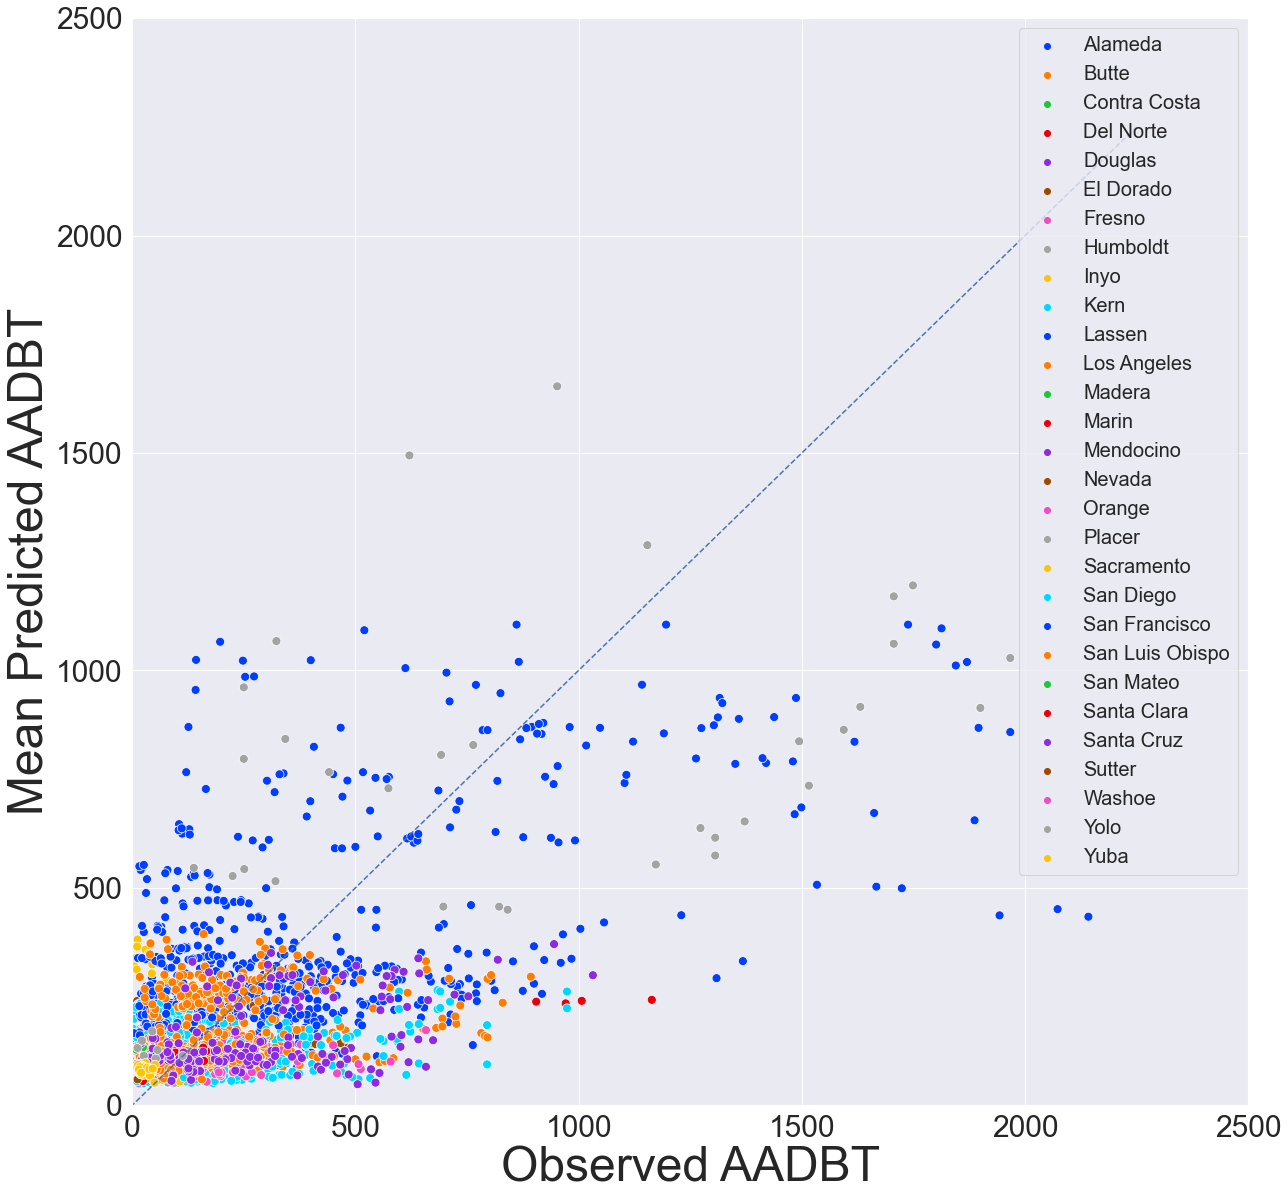

In [90]:
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=graph_nb_data, x="AADB", y="Mean Predicted AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Observed AADBT', ylabel='Mean Predicted AADBT')
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,2500)
plt.ylim(0,2500)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [91]:
#print(NB_CV_model.aic)

# Run the Random Forest with the same set of Variables

In [92]:
model_data=data1[['AADB', 'empnum_density_t', 'exist_bike_parking_q',
       'Intersection_density5', 'pctnoveh_h', 'pctbiketowork_h', 'urban',
       'Yolo', 'log_Stv_adb']]

In [93]:
track=data[['tdg_id','Leg','county', 'year','AADB']]
track['index']=track.index
track.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_10444\85145297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track['index']=track.index


tdg_id  Leg   county    year   AADB  index
0  208578.0  NaN  Alameda  2018.0   31.0      0
1  214389.0  NaN  Alameda  2017.0  191.0      1
2  214389.0  NaN  Alameda  2018.0  214.0      2
3  214389.0  NaN  Alameda  2019.0  210.0      3
4  214389.0  NaN  Alameda  2016.0  152.0      4

In [94]:
# split data into X dataframe and Y dataframe:
X_data = model_data.drop("AADB", axis=1)
Y_data = model_data["AADB"]
print(f"X_data.shape: {X_data.shape} Y_data.shape: {Y_data.shape}")
features = model_data.drop("AADB", axis=1)
feature_list = list(features.columns)
X = np.asarray(X_data)
Y = np.asarray(Y_data)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=94704)

X_data.shape: (4202, 8) Y_data.shape: (4202,)


In [ ]:
# find best hyper parameter
from hyperopt import fmin, tpe, hp, anneal, Trials
random_state=94704
n_iter=500
num_folds=10
kf = KFold(n_splits=num_folds)

def rf_mse_cv(params, random_state=random_state, cv=kf, X=X, Y=Y):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'min_samples_leaf':int(params['min_samples_leaf']),
             'min_samples_split':int(params['min_samples_split'])
             }
    
    # we use this params to create a new RF Regressor
    model = RandomForestRegressor(random_state=random_state, **params)
    score = -cross_val_score(model, X, Y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1,error_score='raise').mean()

    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',50,2000),
           'max_depth':hp.uniform('max_depth',2,150),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,12)}
    best=fmin(fn=rf_mse_cv,space=params,algo=tpe.suggest,trials=trial,max_evals=n_iter,rstate=np.random.default_rng(random_state))
    return best

trial=Trials()
best=optimize(trial)

In [764]:
print(best)

{'max_depth': 13.364629000005356, 'min_samples_leaf': 2.7150729222998384, 'min_samples_split': 3.884153747313602, 'n_estimators': 1690.116719134125}


In [765]:
TID=[t['tid'] for t in trial.trials]
Loss=[t['result']['loss'] for t in trial.trials]
maxd=[t['misc']['vals']['max_depth'][0] for t in trial.trials]
nest=[t['misc']['vals']['n_estimators'][0] for t in trial.trials]
min_ss=[t['misc']['vals']['min_samples_split'][0] for t in trial.trials]
min_sl=[t['misc']['vals']['min_samples_leaf'][0] for t in trial.trials]

hyperopt_rfr=pd.DataFrame({'tid':TID,'loss':Loss,
                          'max_depth':maxd,'n_estimators':nest,
                          'min_samples_split':min_ss, 'min_samples_leaf':min_sl})
hyperopt_rfr['RMSE']=np.sqrt(hyperopt_rfr['loss'])

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

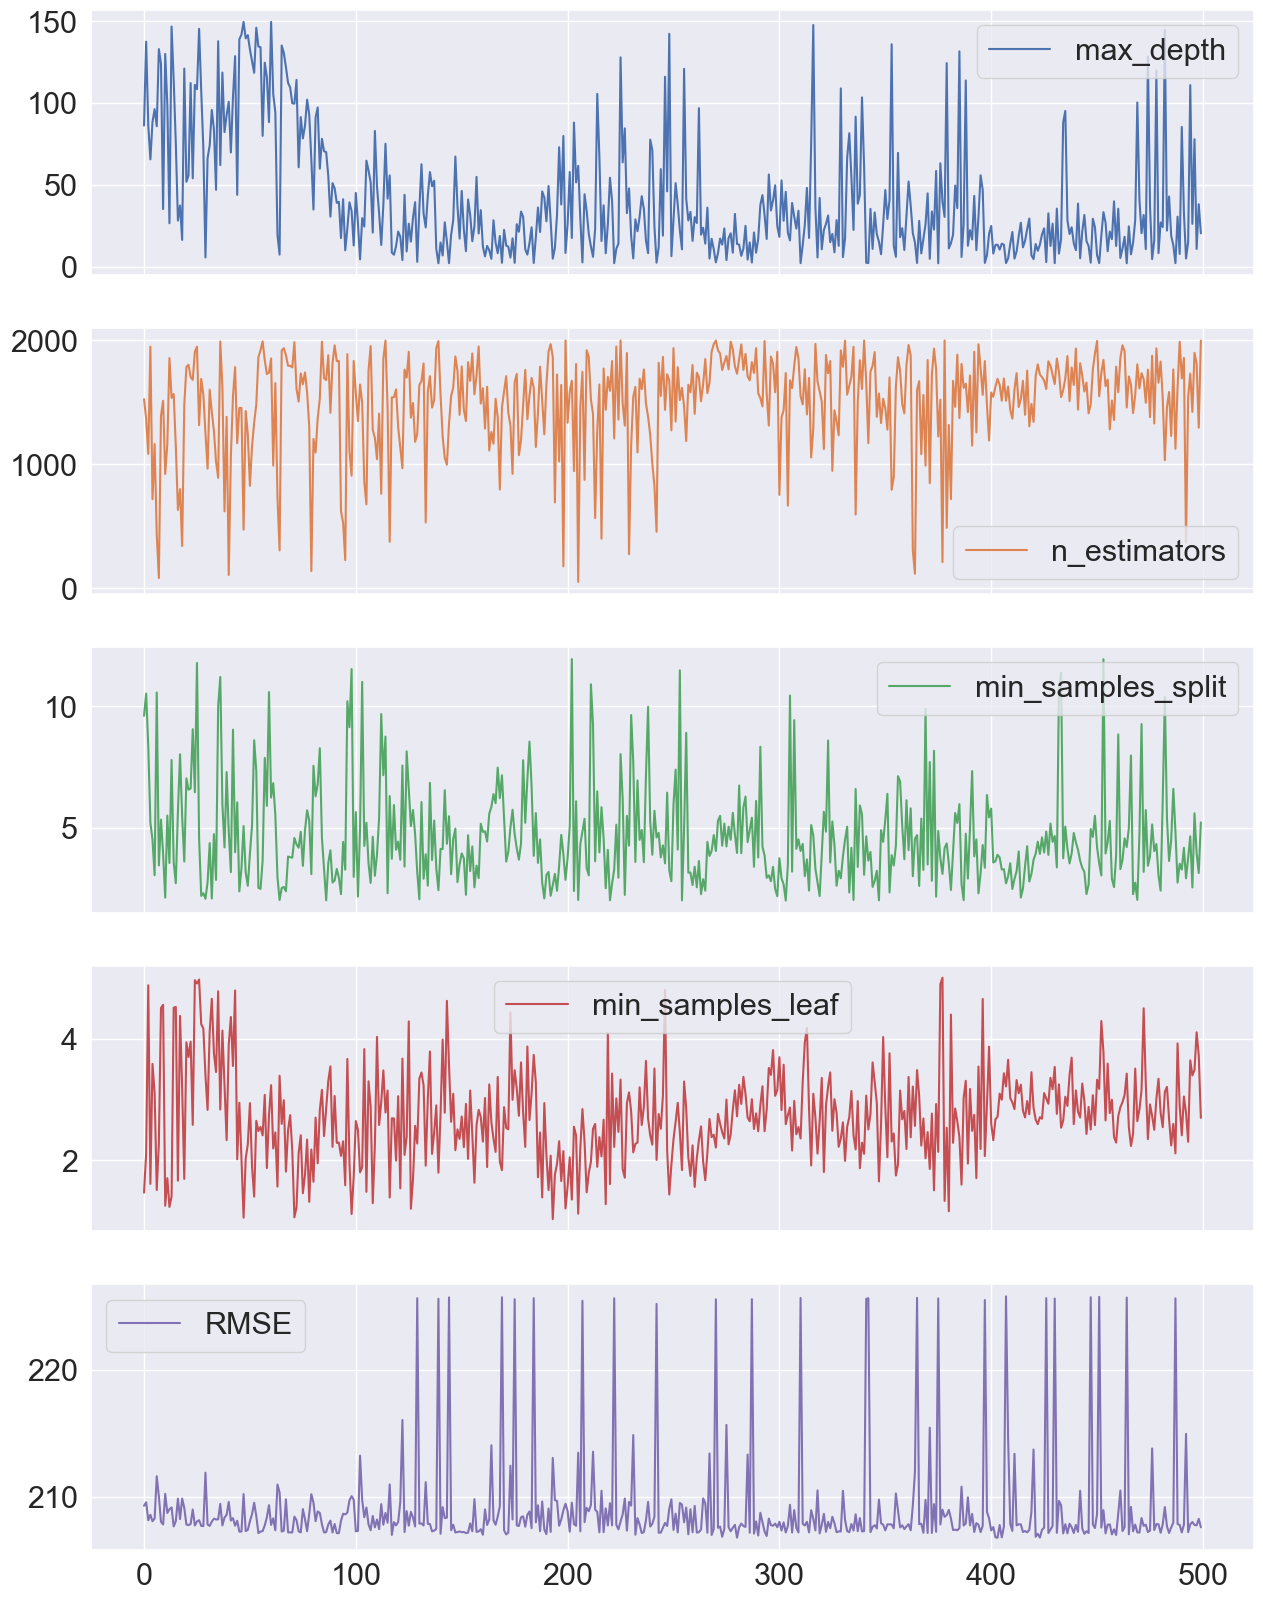

In [766]:
hyperopt_rfr[[
 'max_depth',
 'n_estimators',
 'min_samples_split',
 'min_samples_leaf',
 'RMSE']].plot(subplots=True,figsize=(15, 20))

In [95]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer

class regressor_stratified_cv:
    def __init__(self,n_splits=10,n_repeats=1,group_count=10,random_state=37914,strategy='quantile'):
        self.group_count=group_count
        self.strategy=strategy
        self.cvkwargs=dict(n_splits=n_splits,n_repeats=n_repeats,random_state=random_state)
        self.cv=RepeatedStratifiedKFold(**self.cvkwargs)
        self.discretizer=KBinsDiscretizer(n_bins=self.group_count,encode='ordinal',strategy=self.strategy)  
            
    def split(self,X,y,groups=None):
        kgroups=self.discretizer.fit_transform(y[:,None])[:,0]
        return self.cv.split(X,kgroups,groups)
    
    def get_n_splits(self,X,y,groups=None):
        return self.cv.get_n_splits(X,y,groups)

In [96]:
import warnings
warnings.filterwarnings('ignore')
# Lets breakdown this results by volume bin
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_strategies.html
# Now we do 10fold cv for our NB:
#num_folds = 10
n_splits=10
n_repeats=1
group_count=10
kfold = regressor_stratified_cv(n_splits=n_splits,n_repeats=n_repeats,
        group_count=group_count,random_state=94704,strategy='quantile') #another option uniform

# Now we perform KFold:

fold_num = 1
rf_MAPE_train = []
rf_MAPE_scores = []
rf_RMSE_train = []
rf_RMSE_scores = []
rf_MAE_train = []
rf_MAE_scores = []
rf_R2_train = []
rf_R2_scores = []

rf_low_MAPE_scores = []
rf_low_RMSE_scores = []
rf_low_MAE_scores = []
rf_low_R2_scores = []

rf_med_MAPE_scores = []
rf_med_RMSE_scores = []
rf_med_MAE_scores = []
rf_med_R2_scores = []

rf_high_MAPE_scores = []
rf_high_RMSE_scores = []
rf_high_MAE_scores = []
rf_high_R2_scores = []
test_pred = []



# we split the entire dataframe:
for train, test in kfold.split(X_data, Y_data):
    rf_CV_model = RandomForestRegressor(random_state= 94704,n_estimators=1690,max_depth=13,min_samples_split=4,min_samples_leaf=3,max_features='sqrt',bootstrap=False).fit(X_data.iloc[train], Y_data.iloc[train])
    train_predictions = rf_CV_model.predict(X_data.iloc[train])
    test_predictions = rf_CV_model.predict(X_data.iloc[test])
    predictions_df = pd.DataFrame([X_data.iloc[test].index,rf_CV_model.predict(X_data.iloc[test]),Y_data.iloc[test]]).transpose()
    train_mape = mean_absolute_percentage_error(Y_data.iloc[train], train_predictions)
    rf_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(Y_data.iloc[test], test_predictions)
    rf_MAPE_scores.append(test_mape)
    train_rmse = math.sqrt(mean_squared_error(Y_data.iloc[train], train_predictions))
    rf_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(Y_data.iloc[test], test_predictions))
    rf_RMSE_scores.append(test_rmse)
    train_mae = mean_absolute_error(Y_data.iloc[train], train_predictions)
    rf_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(Y_data.iloc[test], test_predictions)
    rf_MAE_scores.append(test_mae)
    train_r2 = r2_score(Y_data.iloc[train], train_predictions)
    rf_R2_train.append(train_r2)
    score_r2 = r2_score(Y_data.iloc[test], test_predictions)
    rf_R2_scores.append(score_r2)
    test_pred.append(predictions_df)
    appended_data = pd.concat(test_pred)
    # we split the Y[test] into 3 inclusive volumes: low (0-51), medium (52-138), high (>= 138)
    low_Y_test_mask = np.all([Y_data.iloc[test] >= 0, Y_data.iloc[test] <=100], axis=0)
    med_Y_test_mask = np.all([Y_data.iloc[test] >= 101, Y_data.iloc[test] <=300], axis=0)
    high_Y_test_mask = np.all([Y_data.iloc[test] >= 301],axis=0)
   
    rf_low_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))
    rf_low_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask]))))
    rf_low_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))
    rf_low_R2_scores.append(r2_score(Y_data.iloc[test][low_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][low_Y_test_mask])))

    rf_med_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))
    rf_med_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask]))))
    rf_med_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))
    rf_med_R2_scores.append(r2_score(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))

    rf_high_MAPE_scores.append(mean_absolute_percentage_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask])))
    rf_high_RMSE_scores.append(math.sqrt(mean_squared_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask]))))
    rf_high_MAE_scores.append(mean_absolute_error(Y_data.iloc[test][high_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][high_Y_test_mask])))
    rf_high_R2_scores.append(r2_score(Y_data.iloc[test][med_Y_test_mask], rf_CV_model.predict(X_data.iloc[test][med_Y_test_mask])))

    
    print(
        f"------------------------------------------Fold {fold_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={Y[test][low_Y_test_mask].shape[0]}), MED (n={Y[test][med_Y_test_mask].shape[0]}), HIGH (n={Y[test][high_Y_test_mask].shape[0]}), TOTAL IN FOLD (n={test.shape[0]})")
    print(f"\tLow Loss: {rf_low_MAE_scores[-1]}\tMed Loss: {rf_med_MAE_scores[-1]}\tHigh Loss: {rf_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {rf_low_RMSE_scores[-1]}\tMed RMSE: {rf_med_RMSE_scores[-1]}\tHigh RMSE: {rf_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {rf_low_MAPE_scores[-1]}\tMed MAPE: {rf_med_MAPE_scores[-1]}\tHigh MAPE: {rf_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {rf_low_R2_scores[-1]}\tMed R2: {rf_med_R2_scores[-1]}\tHigh R2: {rf_high_R2_scores[-1]}")
    fold_num += 1

print(f"\n\nLow MAE Average: {np.mean(rf_low_MAE_scores)} +/- {np.std(rf_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(rf_low_RMSE_scores)} +/- {np.std(rf_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(rf_low_MAPE_scores)} +/- {np.std(rf_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(rf_low_R2_scores)} +/- {np.std(rf_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(rf_med_MAE_scores)} +/- {np.std(rf_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(rf_med_RMSE_scores)} +/- {np.std(rf_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(rf_med_MAPE_scores)} +/- {np.std(rf_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(rf_med_R2_scores)} +/- {np.std(rf_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(rf_high_MAE_scores)} +/- {np.std(rf_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(rf_high_RMSE_scores)} +/- {np.std(rf_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(rf_high_MAPE_scores)} +/- {np.std(rf_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(rf_high_R2_scores)} +/- {np.std(rf_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(rf_MAE_scores)} +/- {np.std(rf_MAE_scores)}")
print(f"Overall RMSE: {np.mean(rf_RMSE_scores)} +/- {np.std(rf_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(rf_MAPE_scores)} +/- {np.std(rf_MAPE_scores)}")
print(f"Overall R2: {np.mean(rf_R2_scores)} +/- {np.std(rf_R2_scores)}\n\n")


print("Delimited table for linear Regression 10 fold:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 10):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (rf_MAPE_train[i], rf_MAPE_scores[i], rf_RMSE_train[i], rf_RMSE_scores[i], rf_MAE_train[i], rf_MAE_scores[i], rf_R2_train[i], rf_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(rf_MAPE_train), np.mean(rf_MAPE_scores), np.mean(rf_RMSE_train),
      np.mean(rf_RMSE_scores), np.mean(rf_MAE_train), np.mean(rf_MAE_scores), np.mean(rf_R2_train), np.mean(rf_R2_scores)))     

------------------------------------------Fold 1------------------------------------------
	Train MAE: 51.84510744425111	Score Loss: 67.53227788924724
	Train RMSE: 84.80964659591778	Score RMSE: 117.62818941040071
	Train MAPE: 89.23550335011006	Score MAPE: 134.4258288803608
	Train R2:   0.8704898116010849	Score R2: 0.6832189059862102

	3-VOLUME SCORES: LOW (n=238), MED (n=123), HIGH (n=60), TOTAL IN FOLD (n=421)
	Low Loss: 43.28810198856081	Med Loss: 48.61645529407322	High Loss: 202.47827861541012
	Low RMSE: 61.75354008147701	Med RMSE: 61.645473414306714	High RMSE: 272.3382527770438
	Low MAPE: 213.49680375473116	Med MAPE: 28.558357449784584	High MAPE: 37.80594497803945
	Low R2:   -5.11830929480415	Med R2: -0.27781080219828946	High R2: -0.27781080219828946
------------------------------------------Fold 2------------------------------------------
	Train MAE: 51.58295364822111	Score Loss: 71.47068599307939
	Train RMSE: 85.631239672888	Score RMSE: 116.18831414738185
	Train MAPE: 90.48413207

In [97]:
appended_data1=appended_data.rename(columns = {0:'Index_ID',1:'Mean Predicted AADB',2:'Observed AADB'})
appended_data2=appended_data1.groupby('Index_ID').mean()
graph_data=pd.merge(track,appended_data2,left_on='index', right_on='Index_ID', how="inner")
# graph_data['Mean Predicted AADB in Million']=graph_data['Mean Predicted AADB']
# graph_data['Observed AADB in Million']=graph_data['Observed AADB']
graph_data.head()

tdg_id  Leg   county    year   AADB  index  Mean Predicted AADB  \
0  208578.0  NaN  Alameda  2018.0   31.0      0           254.767563   
1  214389.0  NaN  Alameda  2017.0  191.0      1           161.908070   
2  214389.0  NaN  Alameda  2018.0  214.0      2           155.886286   
3  214389.0  NaN  Alameda  2019.0  210.0      3           152.663715   
4  214389.0  NaN  Alameda  2016.0  152.0      4           161.908070   

   Observed AADB  
0           31.0  
1          191.0  
2          214.0  
3          210.0  
4          152.0

In [98]:
graph_data['Observed AADB'].max(), graph_data['Mean Predicted AADB'].max()

(2142.0, 1650.061158895762)

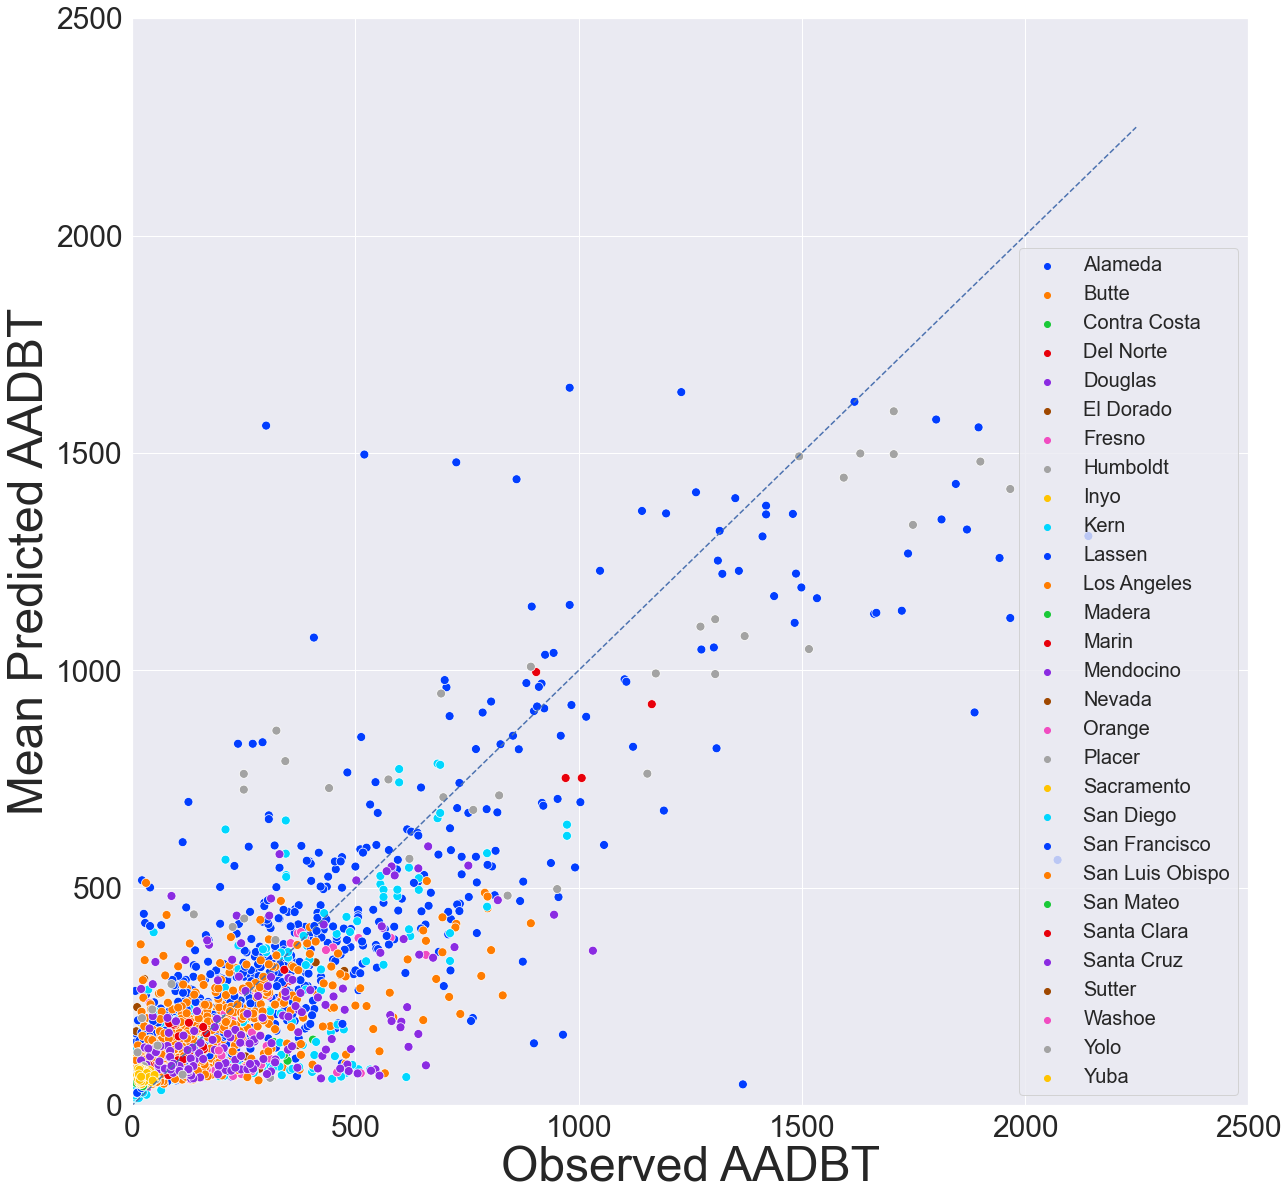

In [99]:
sns.set(font_scale=4) 
plt.figure(figsize=(20,20))
g=sns.scatterplot(data=graph_data, x="Observed AADB", y="Mean Predicted AADB", hue="county", palette="bright",s=80)
g.set(xlabel='Observed AADBT', ylabel='Mean Predicted AADBT')
g.legend(fontsize=20)
abline(1, (0,0))
plt.xlim(0,2500)
plt.ylim(0,2500)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

In [100]:
importances = list(rf_CV_model.feature_importances_)# List of tuples with variable and importance 
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
feature_importances

[('log_Stv_adb', 0.2474),
 ('pctbiketowork_h', 0.2361),
 ('pctnoveh_h', 0.217),
 ('empnum_density_t', 0.0902),
 ('Intersection_density5', 0.0825),
 ('urban', 0.048),
 ('Yolo', 0.0395),
 ('exist_bike_parking_q', 0.0393)]

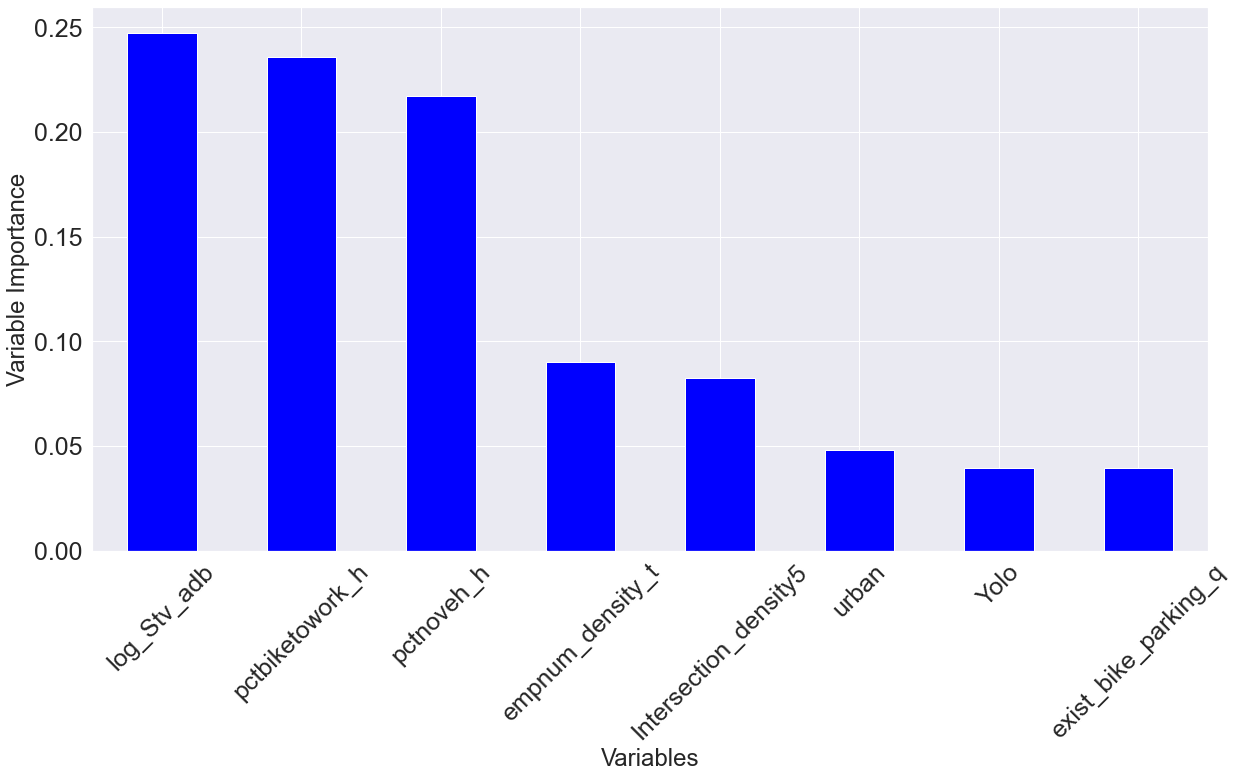

In [101]:
plt.rcParams.update({'font.size': 22})
feature_importances_df = pd.DataFrame(rf_CV_model.feature_importances_, index=X_data.columns, columns=[
                                      'Importance']).sort_values('Importance', ascending=False)
feature_importances_df.plot(kind='bar', figsize=(20, 10), fontsize=25, legend=False,
                          ylabel="Importance", xlabel="Variable",color="blue")
plt.xticks(rotation=45)
plt.xlabel('Variables', fontsize=24)
plt.ylabel('Variable Importance', fontsize=24)
plt.show()
#style='fivethirtyeight'

In [102]:
feature_importances_df

Importance
log_Stv_adb              0.247362
pctbiketowork_h          0.236095
pctnoveh_h               0.217034
empnum_density_t         0.090194
Intersection_density5    0.082510
urban                    0.047957
Yolo                     0.039521
exist_bike_parking_q     0.039328

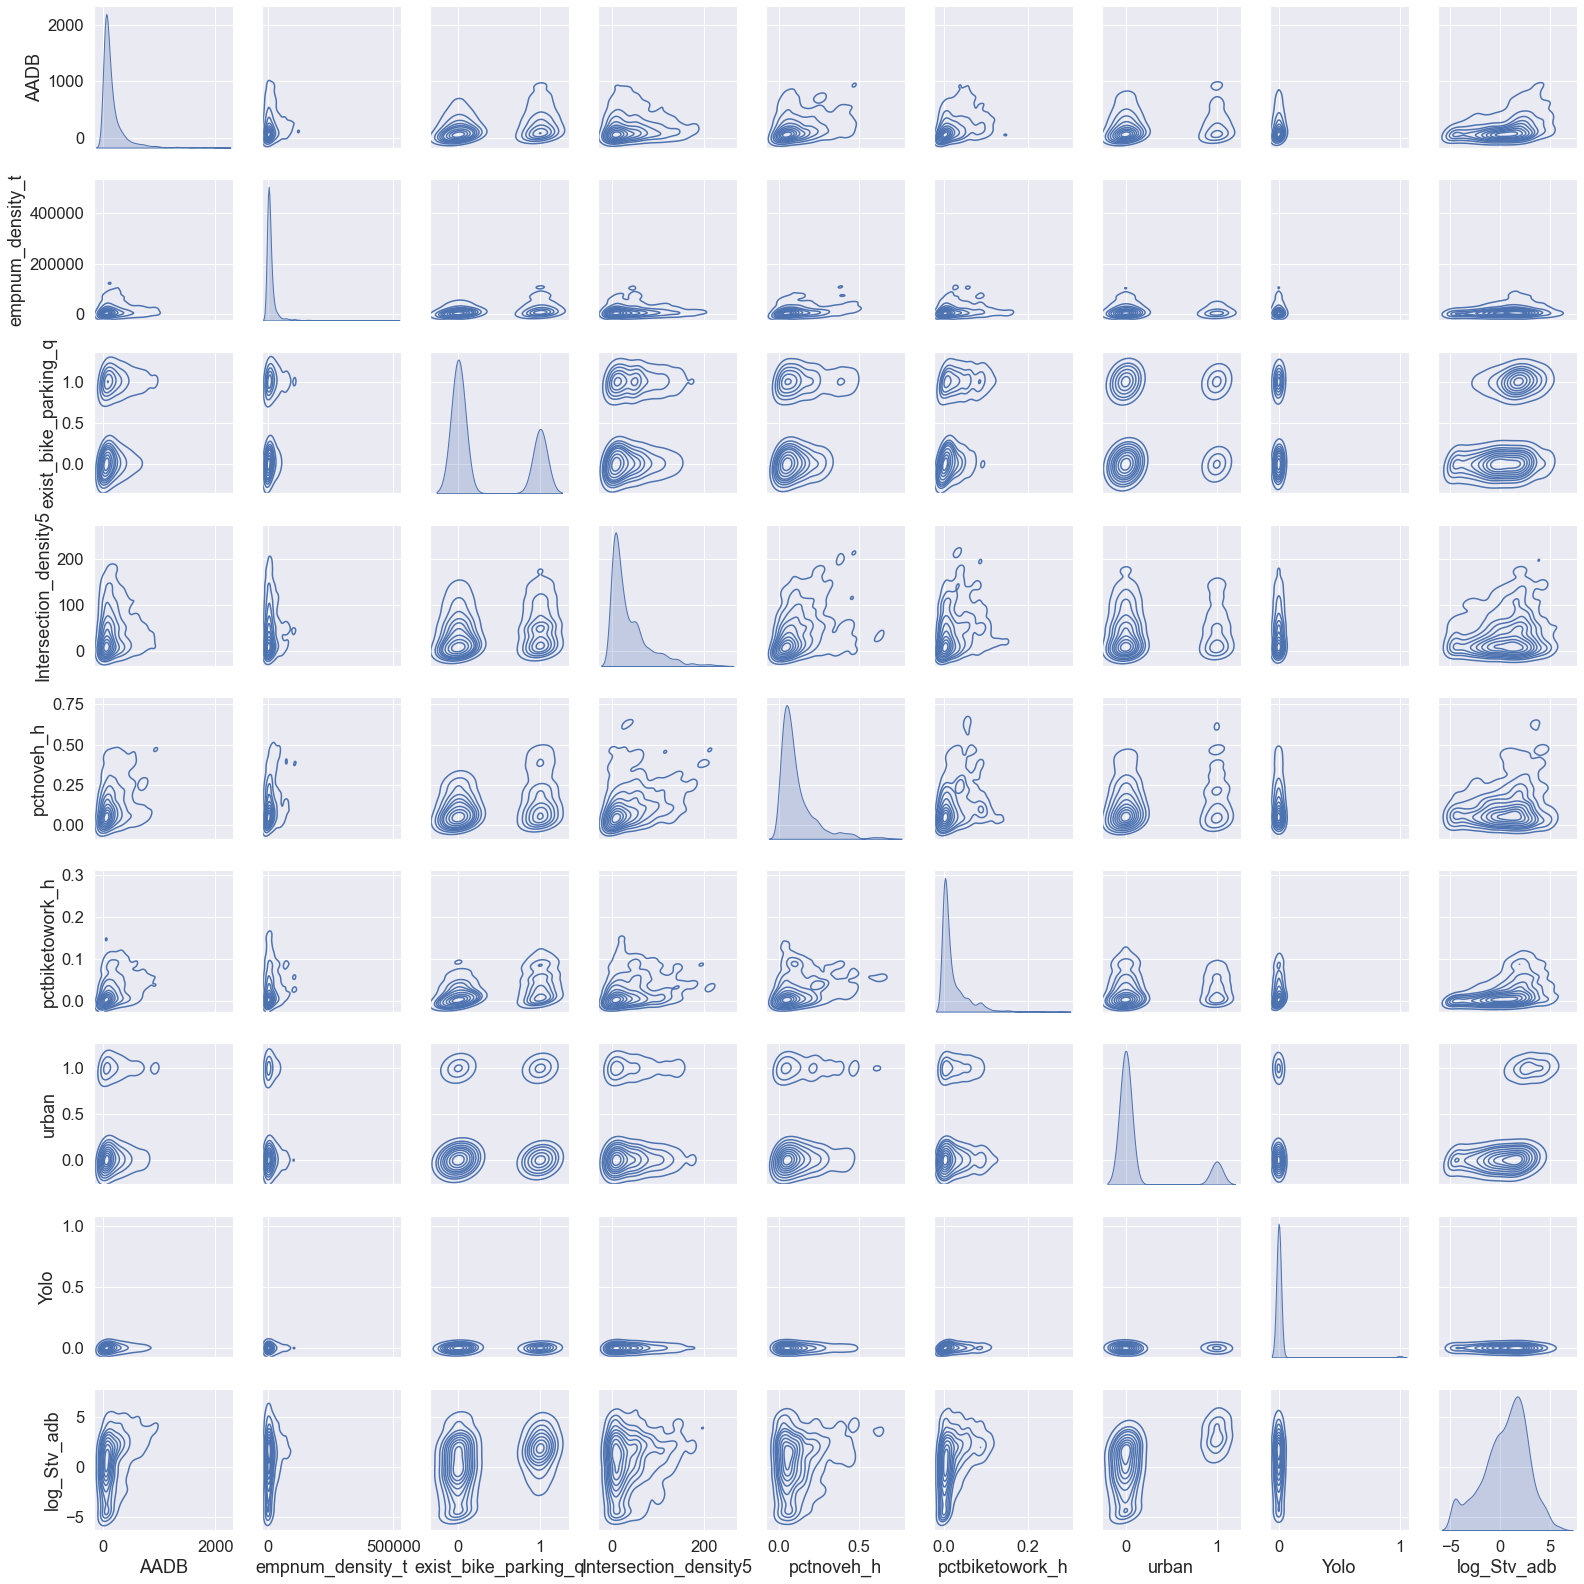

In [103]:
sns.set(font_scale=1.5) 
sns.pairplot(model_data,kind="kde")
#sns.pairplot(df4, kind="kde")

In [104]:
#residual_df['y_pred'] = best_model.predict(X_train)
graph_data['AADB_resid'] = graph_data['Observed AADB'] - graph_data['Mean Predicted AADB']
graph_data['AADB_resid_pct'] = graph_data['AADB_resid'] / graph_data['Mean Predicted AADB']
graph_data['abs_AADB_resid'] = graph_data['AADB_resid'].abs()

<Figure size 1440x1440 with 0 Axes>

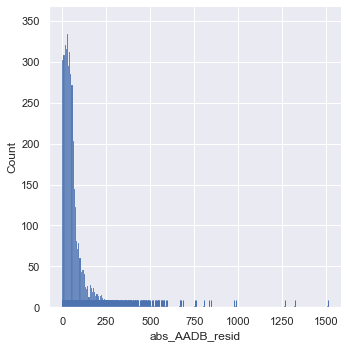

In [105]:
sns.set(font_scale=1) 
plt.figure(figsize=(20,20))
sns.displot(graph_data.abs_AADB_resid, rug=True,alpha=0.99,palette="Blues")

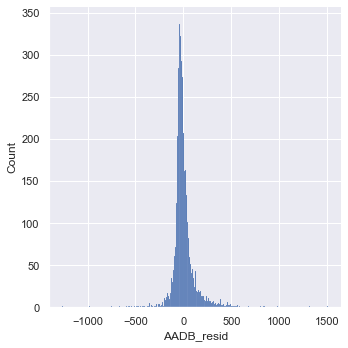

In [106]:
#sns.set_palette("Paired")
#sns.set_palette("pastel")
sns.displot(graph_data.AADB_resid,alpha=0.99,palette="Blues")

### Application of Random Forest Model

In [107]:
shs=pd.read_csv(f'{file_path}/SHS_application_data_july12.csv')
shs=shs.fillna(0)
shs.rename(columns={'d3bpo4':'Intersection_density5'},inplace=True)
#shs['urban']=np.where(shs['location']=='urban',1,0)
shs['Yolo']=np.where(shs['county']=='Yolo',1,0)
shs['Stv_adb']=shs['Stv_leisure_adb']+shs['Stv_commute_adb']
shs['log_Stv_adb']=np.log(shs['Stv_adb']+0.01)

In [108]:
# read the SHS geometry 
geo=gpd.read_file(f'{file_path}/RF Model_SHS_estimate_July24/SHS_AADBT_Estimate.shp')
# take the 
geo1=geo.drop(['county', 'year', 'Field1', 'AADBT', 'index',
       'tdg_id_1', 'county_1'],axis=1)
gdf = geo1.to_crs(epsg=4269)
gdf.head()

tdg_id    Length                                           geometry
0  8523.0  0.297113  LINESTRING (-120.74504 38.73376, -120.74547 38...
1  8530.0  0.308137  LINESTRING (-120.83852 38.75700, -120.83888 38...
2  8534.0  0.047312  LINESTRING (-120.83284 38.68772, -120.83291 38...
3  8535.0  0.401485  LINESTRING (-121.01515 38.84100, -121.01518 38...
4  8536.0  0.346249  LINESTRING (-120.91529 38.81439, -120.91472 38...

In [109]:
# read the urban area shape file
ua=gpd.read_file(f'{file_path}/Urban Area_shape file/data/2010_adjusted_urban_area.shp')
ua.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [110]:
# do the spatial join with eco valid counters
urban=gpd.sjoin(gdf,ua)
urban=urban.drop(['UACE10','NAME10','UATYP10','INTPTLAT10','INTPTLON10'],axis=1)
urban['location']='urban'
urban.head()

tdg_id    Length                                           geometry  \
0   8523.0  0.297113  LINESTRING (-120.74504 38.73376, -120.74547 38...   
2   8534.0  0.047312  LINESTRING (-120.83284 38.68772, -120.83291 38...   
13  8580.0  0.026694  LINESTRING (-120.81802 38.69385, -120.81779 38...   
14  8581.0  0.021401  LINESTRING (-120.80807 38.72849, -120.80769 38...   
16  8587.0  0.235887  LINESTRING (-120.82351 38.69290, -120.82361 38...   

    index_right location  
0           105    urban  
2           105    urban  
13          105    urban  
14          105    urban  
16          105    urban

In [111]:
# get the counters in rural area
rural = gdf.merge(urban, indicator=True, how='outer').query('_merge != "both"').drop('_merge', 1)
rural['location']='rural'
rural.head()

tdg_id    Length                                           geometry  \
1  8530.0  0.308137  LINESTRING (-120.83852 38.75700, -120.83888 38...   
3  8535.0  0.401485  LINESTRING (-121.01515 38.84100, -121.01518 38...   
4  8536.0  0.346249  LINESTRING (-120.91529 38.81439, -120.91472 38...   
5  8545.0  0.046007  LINESTRING (-120.83056 38.75465, -120.83086 38...   
6  8547.0  0.446214  LINESTRING (-120.84813 38.75651, -120.84753 38...   

   index_right location  
1          NaN    rural  
3          NaN    rural  
4          NaN    rural  
5          NaN    rural  
6          NaN    rural

In [112]:
# Now combine rural and urban 
ru=pd.concat([urban,rural],axis=0)
ru1=ru.drop_duplicates(subset=['tdg_id'], keep='first')
ru1['urban']=np.where(ru1['location']=='urban',1,0)
ru1.shape

(87539, 6)

In [113]:
# now combine with others data
app_data=pd.merge(shs, ru1, on=['tdg_id'], how='inner')
app_data.shape

(87539, 206)

In [114]:
app_data.columns

Index(['Unnamed: 0', 'segment_id', 'street_name', 'county', 'tdg_id',
       'lrs_cal_id', 'bikes_proh', 'bike_facs', 'int_tdg_id', 'loc_id',
       ...
       'Minor_Collector', 'Local', 'Yolo', 'Stv_adb', 'log_Stv_adb', 'Length',
       'geometry', 'index_right', 'location', 'urban'],
      dtype='object', length=206)

In [115]:
# Now filter the SHS link only based data provided by John on November 30, 2023
filtered_shs=pd.read_csv(f'{file_path}/smart4_final_output_Dec8_2023.csv')
filtered_shs1=filtered_shs[['tdg_id','shs_status']]
# now we will drop ramp, likely ramp and also all non-statehigh, while we will keep all state hight, local roads that intersect highway and ramp
filtered_shs2=filtered_shs1[(filtered_shs1.shs_status!='RAMP') & (filtered_shs1.shs_status!='LIKELY RAMP')]
filtered_shs3= filtered_shs2[filtered_shs2['shs_status'].notna()]
filtered_shs3.head()

tdg_id shs_status
0  122410        SHS
1  122430        SHS
2  122447        SHS
3  122468        SHS
4  122475        SHS

In [116]:
filtered_shs1.shape, filtered_shs2.shape,filtered_shs3.shape

((87539, 2), (80184, 2), (49902, 2))

In [214]:
filtered_shs1['shs_status'].unique()

array(['SHS', 'XSTREET_SHS', nan, 'RAMP', 'XSTREET_RAMP', 'LIKELY RAMP'],
      dtype=object)

In [117]:
filtered_shs3['shs_status'].unique()

array(['SHS', 'XSTREET_SHS', 'XSTREET_RAMP'], dtype=object)

In [118]:
application_data=pd.merge(app_data,filtered_shs3, on=['tdg_id'], how='inner')
application_data.shape

(49902, 207)

In [119]:
application_data.columns

Index(['Unnamed: 0', 'segment_id', 'street_name', 'county', 'tdg_id',
       'lrs_cal_id', 'bikes_proh', 'bike_facs', 'int_tdg_id', 'loc_id',
       ...
       'Local', 'Yolo', 'Stv_adb', 'log_Stv_adb', 'Length', 'geometry',
       'index_right', 'location', 'urban', 'shs_status'],
      dtype='object', length=207)

In [120]:
# prepare the model data
app_data1=application_data[['tdg_id','shs_status','street_name','county','empnum_density_t', 'exist_bike_parking_q',
       'Intersection_density5', 'pctnoveh_h', 'pctbiketowork_h', 'urban',
       'Yolo', 'log_Stv_adb']]

In [121]:
# prepare the model data
rf_app_model_data=app_data1[['empnum_density_t', 'exist_bike_parking_q',
       'Intersection_density5', 'pctnoveh_h', 'pctbiketowork_h', 'urban',
       'Yolo', 'log_Stv_adb']]

In [122]:
rf_app_model_data.shape,app_data1.shape

((49902, 8), (49902, 12))

In [123]:
shs_track=app_data1[['tdg_id','county','street_name','shs_status']].reset_index()
shs_track['index']=shs_track.index
shs_track.head()

index  tdg_id     county       street_name   shs_status
0      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS
1      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS
2      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS
3      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS
4      4  6507.0  Del Norte           NO NAME  XSTREET_SHS

In [124]:
shs_track.shape

(49902, 5)

In [125]:
# now apply RF model
shs_pred = np.asarray(rf_app_model_data)

In [126]:
shs_predictions = rf_CV_model.predict(shs_pred)
shs_predictions_df = pd.DataFrame(shs_predictions,columns=['AADBT'])
shs_predictions_df['index']=shs_predictions_df.index
shs_prediction=pd.merge(shs_predictions_df,shs_track,on=['index'], how='inner')
shs_prediction.head()

AADBT  index  tdg_id     county       street_name   shs_status
0  89.933694      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS
1  69.622775      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS
2  89.933694      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS
3  70.053446      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS
4  91.261439      4  6507.0  Del Norte           NO NAME  XSTREET_SHS

In [127]:
shs_prediction['AADBT'].describe()

count    49902.000000
mean       114.287034
std         57.615950
min         28.536088
25%         79.568414
50%         94.469697
75%        136.583163
max       1362.511582
Name: AADBT, dtype: float64

In [128]:
# now bring the geometry and length back
#geo2=geo.drop(['county', 'year', 'Field1', 'AADBT', 'index',
#       'tdg_id_1', 'county_1'],axis=1)
shs_pred=pd.merge(shs_prediction, gdf, on=['tdg_id'], how='inner')
#pr_gdf =shs_pred.to_crs(epsg=4269, geometry='geometry')
shs_pred.head()

AADBT  index  tdg_id     county       street_name   shs_status  \
0  89.933694      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS   
1  69.622775      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS   
2  89.933694      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS   
3  70.053446      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS   
4  91.261439      4  6507.0  Del Norte           NO NAME  XSTREET_SHS   

     Length                                           geometry  
0  0.016049  LINESTRING (-124.20812 41.99626, -124.20811 41...  
1  0.036890  LINESTRING (-124.20811 41.99602, -124.20808 41...  
2  0.016515  LINESTRING (-124.20780 41.99624, -124.20812 41...  
3  0.199039  LINESTRING (-124.20789 41.99231, -124.20783 41...  
4  0.189292  LINESTRING (-124.20789 41.99231, -124.20809 41...

In [129]:
# Assign the catagory of the volume
def vol_bin(AADBT):
    if AADBT<=100:
        return 'low'
    elif ((AADBT>100) & (AADBT<=300)):
        return 'mid'
    else:
        return 'high'
shs_pred['class']=shs_pred.apply(lambda row:vol_bin(row['AADBT']),axis=1)  
#shs_pred = shs_pred.rename(columns={'street_name': 'street_name'})
shs_pred.head()

AADBT  index  tdg_id     county       street_name   shs_status  \
0  89.933694      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS   
1  69.622775      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS   
2  89.933694      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS   
3  70.053446      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS   
4  91.261439      4  6507.0  Del Norte           NO NAME  XSTREET_SHS   

     Length                                           geometry class  
0  0.016049  LINESTRING (-124.20812 41.99626, -124.20811 41...   low  
1  0.036890  LINESTRING (-124.20811 41.99602, -124.20808 41...   low  
2  0.016515  LINESTRING (-124.20780 41.99624, -124.20812 41...   low  
3  0.199039  LINESTRING (-124.20789 41.99231, -124.20783 41...   low  
4  0.189292  LINESTRING (-124.20789 41.99231, -124.20809 41...   low

In [130]:
app_data2=app_data[['tdg_id','Stv_adb','empnum_density_t', 'exist_bike_parking_q',
       'Intersection_density5', 'pctnoveh_h', 'pctbiketowork_h', 'urban',
       'Yolo', 'log_Stv_adb']]

In [131]:
app_data2.shape

(87539, 10)

In [132]:
# Include the app data with the prediction
shs_pred1=pd.merge(shs_pred,app_data2, on=['tdg_id'], how='inner')
shs_pred2=shs_pred1.drop_duplicates(subset=['tdg_id'], keep='first')
shs_pred2.shape

(49902, 18)

In [133]:
shs_pred2.groupby(['class'])['Length'].sum()

class
high      111.522549
low     14234.827397
mid      7214.814696
Name: Length, dtype: float64

In [134]:
# Import json file for visualization
crs = {'init': 'epsg:4269'}
shs_rf_pred = gpd.GeoDataFrame(shs_pred2, crs=crs, geometry = 'geometry')
shs_rf_pred.to_file(f'{file_path}/SHS_AADBT_Prediction_Uisng_RF_Model_Dec11_2023.json', driver="GeoJSON")

# Application of Poisson Regression Model in SHS

In [135]:
# end of the Analysis
#AADB ~log_Stv_adb+exist_bike_parking_q+pctnoveh_h+pctbiketowork_h+Intersection_density5+Yolo'
PR_app_data=app_data1[['log_Stv_adb','exist_bike_parking_q','pctnoveh_h','pctbiketowork_h','Intersection_density5','Yolo']]

In [136]:
PR_app_data.shape

(49902, 6)

In [137]:
# Apply the PR model to state highways system
pr_shs_predictions = PR_CV_model.predict(PR_app_data)
pr_shs_predictions_df = pd.DataFrame(pr_shs_predictions,columns=['AADBT'])
pr_shs_predictions_df['index']=pr_shs_predictions_df.index
pr_shs_prediction1=pd.merge(pr_shs_predictions_df,shs_track,on=['index'], how='inner')
pr_shs_prediction1.head()

AADBT  index  tdg_id     county       street_name   shs_status
0  36.696707      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS
1  87.512852      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS
2  36.696707      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS
3  87.694020      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS
4  45.442400      4  6507.0  Del Norte           NO NAME  XSTREET_SHS

In [138]:
pr_shs_prediction1.shape

(49902, 6)

In [139]:
pr_shs_predictions_df.head()

AADBT  index
0  36.696707      0
1  87.512852      1
2  36.696707      2
3  87.694020      3
4  45.442400      4

In [140]:
pr_shs_prediction1['AADBT'].describe()

count    49902.000000
mean        77.879919
std         59.106387
min         29.571450
25%         46.957897
50%         65.731264
75%         92.321288
max       4780.804941
Name: AADBT, dtype: float64

In [141]:
# now bring the geometry and length back
# geo2=geo.drop(['county', 'year', 'Field1', 'AADBT', 'index',
#        'tdg_id_1', 'county_1'],axis=1)
pr_shs_pred=pd.merge(pr_shs_prediction1, gdf, on=['tdg_id'], how='inner')
pr_shs_pred.head()

AADBT  index  tdg_id     county       street_name   shs_status  \
0  36.696707      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS   
1  87.512852      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS   
2  36.696707      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS   
3  87.694020      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS   
4  45.442400      4  6507.0  Del Norte           NO NAME  XSTREET_SHS   

     Length                                           geometry  
0  0.016049  LINESTRING (-124.20812 41.99626, -124.20811 41...  
1  0.036890  LINESTRING (-124.20811 41.99602, -124.20808 41...  
2  0.016515  LINESTRING (-124.20780 41.99624, -124.20812 41...  
3  0.199039  LINESTRING (-124.20789 41.99231, -124.20783 41...  
4  0.189292  LINESTRING (-124.20789 41.99231, -124.20809 41...

In [142]:
# Classify the millage
pr_shs_pred['class']=pr_shs_pred.apply(lambda row:vol_bin(row['AADBT']),axis=1)   
pr_shs_pred.head()

AADBT  index  tdg_id     county       street_name   shs_status  \
0  36.696707      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS   
1  87.512852      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS   
2  36.696707      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS   
3  87.694020      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS   
4  45.442400      4  6507.0  Del Norte           NO NAME  XSTREET_SHS   

     Length                                           geometry class  
0  0.016049  LINESTRING (-124.20812 41.99626, -124.20811 41...   low  
1  0.036890  LINESTRING (-124.20811 41.99602, -124.20808 41...   low  
2  0.016515  LINESTRING (-124.20780 41.99624, -124.20812 41...   low  
3  0.199039  LINESTRING (-124.20789 41.99231, -124.20783 41...   low  
4  0.189292  LINESTRING (-124.20789 41.99231, -124.20809 41...   low

In [143]:
pr_shs_pred.shape

(49906, 9)

In [144]:
pr_shs_pred.groupby(['class'])['Length'].sum()

class
high       32.728972
low     18933.533979
mid      2598.168672
Name: Length, dtype: float64

In [145]:
pr_shs_pred.groupby(['class'])['class'].count()

class
high      321
low     39973
mid      9612
Name: class, dtype: int64

In [146]:
# Include the app data with the prediction
pr_d1=pd.merge(pr_shs_pred,app_data2, on=['tdg_id'], how='inner')
pr_d2=pr_d1.drop_duplicates(subset=['tdg_id'], keep='first')
#pr_d2 = pr_d2.rename(columns={'street_name_y': 'street_name'})
pr_d2.head()

AADBT  index  tdg_id     county       street_name   shs_status  \
0  36.696707      0  6496.0  Del Norte  SR-101-DEL NORTE          SHS   
1  87.512852      1  6497.0  Del Norte  SR-101-DEL NORTE          SHS   
2  36.696707      2  6498.0  Del Norte  SR-101-DEL NORTE          SHS   
3  87.694020      3  6500.0  Del Norte  SR-101-DEL NORTE          SHS   
4  45.442400      4  6507.0  Del Norte           NO NAME  XSTREET_SHS   

     Length                                           geometry class  \
0  0.016049  LINESTRING (-124.20812 41.99626, -124.20811 41...   low   
1  0.036890  LINESTRING (-124.20811 41.99602, -124.20808 41...   low   
2  0.016515  LINESTRING (-124.20780 41.99624, -124.20812 41...   low   
3  0.199039  LINESTRING (-124.20789 41.99231, -124.20783 41...   low   
4  0.189292  LINESTRING (-124.20789 41.99231, -124.20809 41...   low   

    Stv_adb  empnum_density_t  exist_bike_parking_q  Intersection_density5  \
0  0.000000          0.000000                   0.0                    0.0   
1  2.123288          0.000000                   0.0                    0.0   
2  0.000000          0.000000                   0.0                    0.0   
3  2.150685        159.154943                   0.0                    0.0   
4  0.027397        159.154943                   0.0                    0.0   

   pctnoveh_h  pctbiketowork_h  urban  Yolo  log_Stv_adb  
0    0.027174              0.0      0     0    -4.605170  
1    0.027174              0.0      0     0     0.757664  
2    0.027174              0.0      0     0    -4.605170  
3    0.027174              0.0      0     0     0.770425  
4    0.027174              0.0      0     0    -3.286158

In [147]:
pr_d2['AADBT'].describe()

count    49902.000000
mean        77.879919
std         59.106387
min         29.571450
25%         46.957897
50%         65.731264
75%         92.321288
max       4780.804941
Name: AADBT, dtype: float64

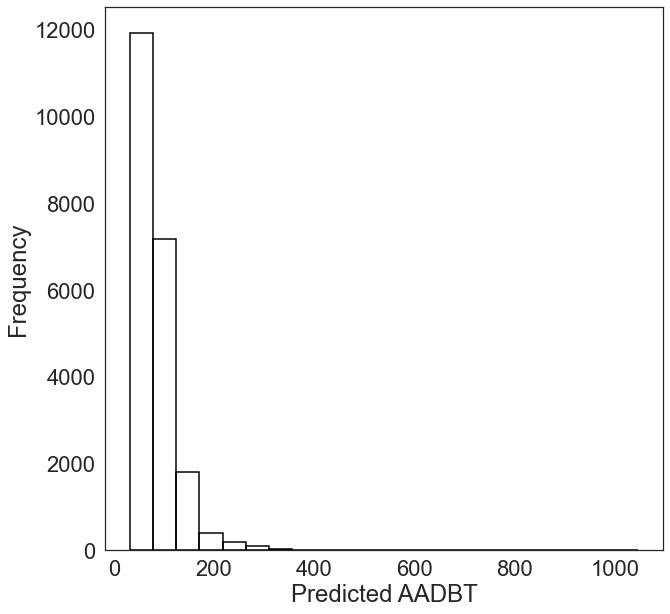

In [148]:
# Bar density plot for permanent counters AADBT

plt.figure(figsize=(10,10))
sns.set_theme(style='white',font_scale=2)
g=sns.histplot(data=pr_d2.loc[pr_d2['shs_status']=='SHS'], x="AADBT",  fill=False,bins=22,color = 'Black')
g.set(xlabel='Predicted AADBT')
g.set(ylabel='Frequency')
plt.show()


In [217]:
pr_d2['shs_status'].unique()

array(['SHS', 'XSTREET_SHS', 'XSTREET_RAMP'], dtype=object)

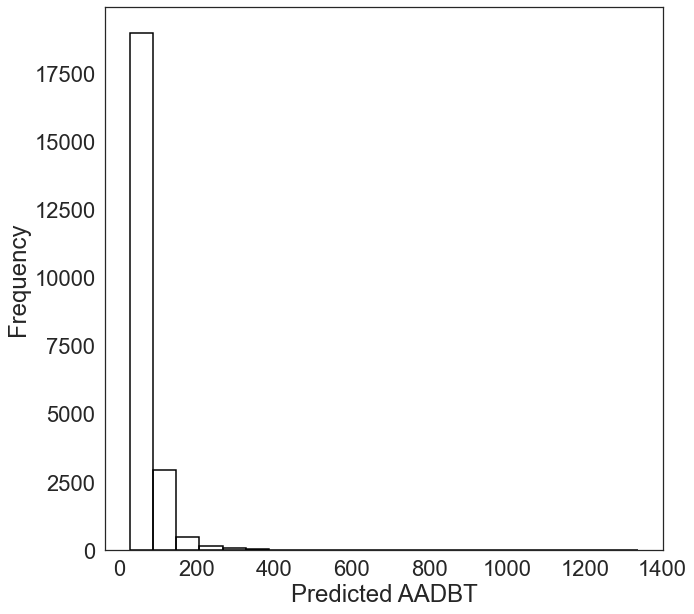

In [215]:
plt.figure(figsize=(10,10))
sns.set_theme(style='white',font_scale=2)
g=sns.histplot(data=pr_d2.loc[pr_d2['shs_status']=='XSTREET_SHS'], x="AADBT",  fill=False,bins=22,color = 'Black')
g.set(xlabel='Predicted AADBT')
g.set(ylabel='Frequency')
plt.show()

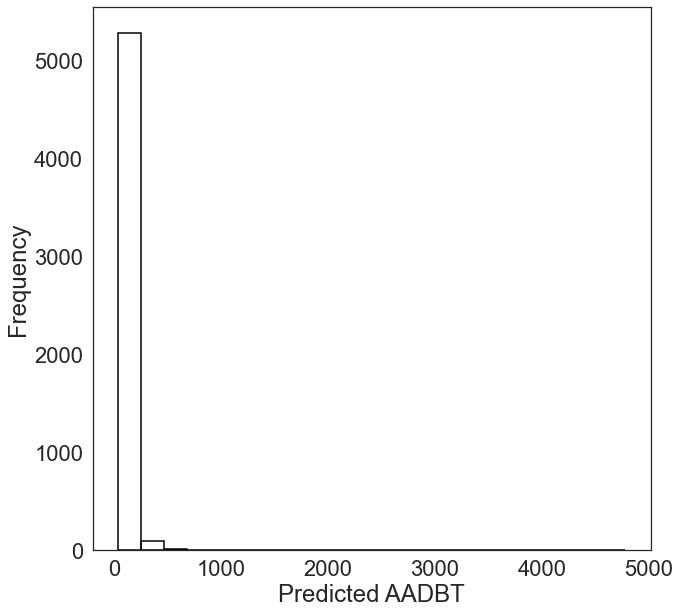

In [218]:
plt.figure(figsize=(10,10))
sns.set_theme(style='white',font_scale=2)
g=sns.histplot(data=pr_d2.loc[pr_d2['shs_status']=='XSTREET_RAMP'], x="AADBT",  fill=False,bins=22,color = 'Black')
g.set(xlabel='Predicted AADBT')
g.set(ylabel='Frequency')
plt.show()

In [149]:
# Lets export Poisson regression estimated to set in excel
excel_data=pr_d2[['tdg_id','street_name','Stv_adb','log_Stv_adb','exist_bike_parking_q','pctnoveh_h','pctbiketowork_h','Intersection_density5','Yolo','AADBT']]
excel_data.to_csv(f'{file_path}/PR_excel_Prediction_data.csv')

In [150]:
excel_data.head()

tdg_id       street_name   Stv_adb  log_Stv_adb  exist_bike_parking_q  \
0  6496.0  SR-101-DEL NORTE  0.000000    -4.605170                   0.0   
1  6497.0  SR-101-DEL NORTE  2.123288     0.757664                   0.0   
2  6498.0  SR-101-DEL NORTE  0.000000    -4.605170                   0.0   
3  6500.0  SR-101-DEL NORTE  2.150685     0.770425                   0.0   
4  6507.0           NO NAME  0.027397    -3.286158                   0.0   

   pctnoveh_h  pctbiketowork_h  Intersection_density5  Yolo      AADBT  
0    0.027174              0.0                    0.0     0  36.696707  
1    0.027174              0.0                    0.0     0  87.512852  
2    0.027174              0.0                    0.0     0  36.696707  
3    0.027174              0.0                    0.0     0  87.694020  
4    0.027174              0.0                    0.0     0  45.442400

In [151]:
# Import json file for visualization
crs = {'init': 'epsg:4269'}
pr_shs_pred1= gpd.GeoDataFrame(pr_d2, crs=crs, geometry = 'geometry')
pr_shs_pred1.to_file(f'{file_path}/SHS_AADBT_Prediction_Uisng_PR_Model_Dec11_2023.json', driver="GeoJSON")

# import the ground truth data with geometry for visualization purposes

In [152]:
gdf = gpd.GeoDataFrame(
    data1, geometry=gpd.points_from_xy(data1.Long, data1.Lat), crs="EPSG:4326"
)
gdf.head()

Unnamed: 0   county      X       ID location        Lat       Long    year  \
0         1.0  Alameda  122.0   8578.0    urban  37.849934 -122.28885  2018.0   
1         4.0  Alameda  128.0  14389.0    urban  37.533787 -122.07950  2017.0   
2         5.0  Alameda  129.0  14389.0    urban  37.533787 -122.07950  2018.0   
3         6.0  Alameda  130.0  14389.0    urban  37.533787 -122.07950  2019.0   
4         7.0  Alameda  127.0  14389.0    urban  37.533787 -122.07950  2016.0   

       ATT  no_of_months_data_collected  ... Los_Angeles  San_Diego  Yolo  \
0  11376.0                          1.0  ...           0          0     0   
1  69539.0                         12.0  ...           0          0     0   
2  77973.0                         12.0  ...           0          0     0   
3  76522.0                         12.0  ...           0          0     0   
4  55379.0                          9.0  ...           0          0     0   

   Orange  log_Stv_commute_adb log_Stv_leisure_adb    Stv_adb  log_Stv_adb  \
0       0             2.268773            1.820409  15.821918     2.762028   
1       0            -2.974051           -2.848257   0.089041    -2.312220   
2       0            -3.286158           -2.736534   0.082192    -2.383884   
3       0            -2.736534           -2.974051   0.095890    -2.245351   
4       0            -2.974051           -2.848257   0.089041    -2.312220   

   log_slope                     geometry  
0  -3.822693  POINT (-122.28885 37.84993)  
1  -4.588440  POINT (-122.07950 37.53379)  
2  -4.588440  POINT (-122.07950 37.53379)  
3  -4.588440  POINT (-122.07950 37.53379)  
4  -4.588440  POINT (-122.07950 37.53379)  

[5 rows x 215 columns]

In [221]:
list(gdf.columns)

['Unnamed: 0',
 'county',
 'X',
 'ID',
 'location',
 'Lat',
 'Long',
 'year',
 'ATT',
 'no_of_months_data_collected',
 'type',
 'AADB',
 'ATT.in.Million',
 'matched_seg_id',
 'segment_id',
 'street_name',
 'tdg_id',
 'lrs_cal_id',
 'bikes_proh',
 'int_tdg_id',
 'loc_id',
 'seg_counter',
 'fclass',
 'tasas_ids',
 'ataip_ids',
 'fc_draft',
 'speed',
 'slope',
 'empnum_density_t',
 'geom_length',
 'access_code',
 'adt_amt',
 'truck_adt_amt',
 'rt_lanes_amt',
 'lt_lanes_amt',
 'rt_trav_way_width',
 'rt_i_shd_tot_width',
 'rt_o_shd_tot_width',
 'lt_trav_way_width',
 'lt_i_shd_tot_width',
 'lt_o_shd_tot_width',
 'near_strava_id',
 'empnum_density_q',
 'empnum_density_h',
 'near_univ_miles',
 'near_large_univ_miles',
 'eco_type',
 'forward_trip_count',
 'reverse_trip_count',
 'forward_commute_trip_count',
 'reverse_commute_trip_count',
 'forward_leisure_trip_count',
 'reverse_leisure_trip_count',
 'forward_average_speed',
 'reverse_average_speed',
 'index',
 'Leg',
 'ATT.in.Thousands',
 'rowI

In [223]:
gr_data_vis=gdf[['tdg_id','ID','street_name','type','AADB','year','Lat', 'Long','geometry']]
gr_data_vis=gr_data_vis.loc[gr_data_vis['year']==2019]
gr_data_vis.head(10)

tdg_id       ID               street_name           type   AADB  \
3     214389.0  14389.0                     SR-84  eco_permanent  210.0   
8     221803.0  21803.0              Adams Street  eco_permanent  351.0   
26    247049.0  47049.0           Harrison Street  eco_permanent  458.0   
27    251474.0  51474.0  MacArthur Bike Boulevard  eco_permanent    7.0   
265   207080.0   7080.0         Alamo Canal Trail  eco_permanent  125.0   
269   212243.0  12243.0          Iron Horse Trail  eco_permanent  122.0   
273   212244.0  12244.0          Iron Horse Trail  eco_permanent   84.0   
280   239406.0  39406.0           Creekview Drive  eco_permanent   35.0   
283   239409.0  39409.0          Iron Horse Trail  eco_permanent  212.0   
1211    1605.0      0.0           East 9th Street     short_term   43.0   

        year        Lat        Long                     geometry  
3     2019.0  37.533787 -122.079500  POINT (-122.07950 37.53379)  
8     2019.0  37.814124 -122.255859  POINT (-122.25586 37.81412)  
26    2019.0  37.808444 -122.263378  POINT (-122.26338 37.80844)  
27    2019.0  37.784776 -122.189094  POINT (-122.18909 37.78478)  
265   2019.0  37.702540 -121.919760  POINT (-121.91976 37.70254)  
269   2019.0  37.690407 -121.882410  POINT (-121.88241 37.69041)  
273   2019.0  37.699400 -121.895010  POINT (-121.89501 37.69940)  
280   2019.0  37.713730 -121.876040  POINT (-121.87604 37.71373)  
283   2019.0  37.703522 -121.900696  POINT (-121.90070 37.70352)  
1211  2019.0  39.726460 -121.833480  POINT (-121.83348 39.72646)

In [224]:
gr_data_vis.shape

(458, 9)

In [230]:
# Import json file for visualization
crs = {'init': 'epsg:4269'}
gr_vis= gpd.GeoDataFrame(gr_data_vis, crs=crs, geometry = 'geometry')
gr_vis.to_file(f'{file_path}/Eco_short_Ground_truth_2019.json', driver="GeoJSON")

# end of the code